In [146]:
import Plotter
import matplotlib.pyplot as plt
import colors
import data_tools as tool
import numpy as np
import pandas as pd
pd.options.mode.copy_on_write = True


data = pd.read_excel('plot_data\\Tablas.xlsx', sheet_name=None)
sheets = list(data.keys())

fondos = data[sheets[0]].copy()
fondos = fondos.dropna(axis = 1, how='all').dropna(axis=0,how = 'any')
fondos.columns = fondos.iloc[0,:]
fondos = fondos.iloc[1:,:]

siglas = ['FONE','FASSA','FAIS','FORTAMUN','FAM','FAETA','FASP','FAFEF','TOTAL']

fondos['Fondo'] = siglas
fondos.set_index('Fondo',drop=True, inplace=True)
fondos_mt = fondos.iloc[:-1,:]
fondos_mt['%'] = 100 * fondos_mt['%']


fondos_mt = tool.divide_in_ms(fondos_mt, 'Monto', 2)  # Millones
fondos_mt = tool.divide_in_ms(fondos_mt, 'Monto', 3)  # Miles de Millones 
fondos_mt

2,Monto,%,Monto_MM,Monto_MMM
Fondo,,,,
FONE,424326249225,51.105197,424326.25,424.33
FASSA,117537248258,14.156004,117537.25,117.54
FAIS,94321009825,11.359876,94321.01,94.32
FORTAMUN,95547846713,11.507635,95547.85,95.55
FAM,30353958250,3.655784,30353.96,30.35
FAETA,8019426362,0.965847,8019.43,8.02
FASP,7988049749,0.962068,7988.05,7.99
FAFEF,52205825000,6.287589,52205.82,52.21


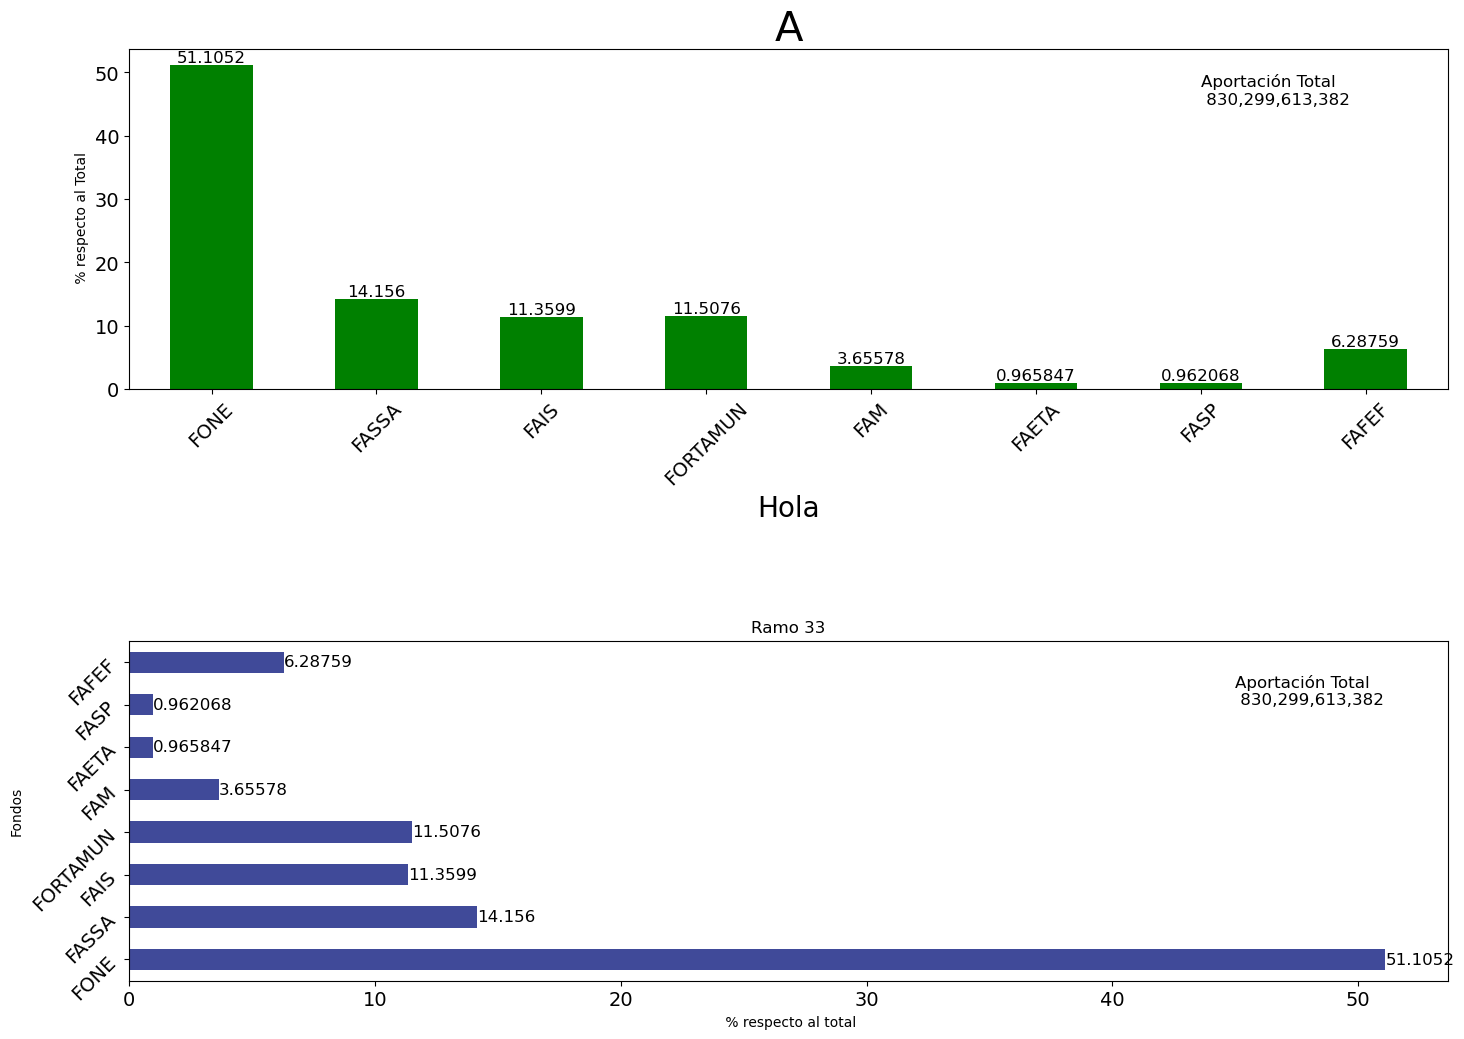

In [147]:
import matplotlib.pyplot as plt

fig1, ax = plt.subplots(2)

Plotter.barplot_df(fondos_mt, '%', ax[0])
props = {
    'orientation' : 'barh',
    'rotation': 45,
    'title': 'Ramo 33',
    'color': colors.vp,
    'xlabel': ' % respecto al total',
    'ylabel': 'Fondos',
    'fontsize': 14
}
Plotter.barplot_df(fondos_mt, '%', ax[1], config = props)
ax[0].set_xlabel('Hola', fontsize = 20)
ax[0].set_title('A', fontsize = 30)
ax[0].text(x = 6, y = 45, s = f'Aportación Total \n {fondos.iloc[-1,0]:,}',fontsize = 12)
ax[1].text(x = 45, y = 6, s = f'Aportación Total \n {fondos.iloc[-1,0]:,}',fontsize = 12)
plt.tight_layout(h_pad=-4)
Plotter.figure_base(fig1)

In [148]:
fisdmf2022 = data[sheets[1]].copy()
fisdmf2022 = fisdmf2022.iloc[3:,1:]
fisdmf2022
fisdmf2022.columns = fisdmf2022.iloc[0,:]
fisdmf2022 = fisdmf2022.iloc[1:]
fisdmf2022.set_index('E N T I D A D E S',drop=True,inplace=True)

abr = pd.read_excel('plot_data\\Abreviaturas.xlsx')
abtra = [t.replace('MX-','') for t in abr['Abreviatura'].to_list()]
new_c = ['TOTAL'] + abtra + ['ASF']

fisdmf2022['Estados*'] = new_c
fisdmf2022.set_index('Estados*',inplace=True)
fisdmf2022['ANUAL %'] = 100 * fisdmf2022['ANUAL'] / fisdmf2022.iloc[0, 0] 


fis_data = fisdmf2022[['ANUAL','ANUAL %']]
fis_data = fis_data.iloc[1:-1]
fis_data['ANUAL MDP'] = fis_data['ANUAL'] / 1e6
fis_data['ANUAL MMDP'] = fis_data['ANUAL'] / 1e9
fis_data.sort_values('ANUAL %',ascending=True,inplace=True)
fis_data

3,ANUAL,ANUAL %,ANUAL MDP,ANUAL MMDP
Estados*,,,,
BCS,241962342,0.291915,241.962342,0.241962
AGU,380213034,0.458707,380.213034,0.380213
COL,421991920,0.509111,421.99192,0.421992
BCN,622524780,0.751044,622.52478,0.622525
COA,731118970,0.882057,731.11897,0.731119
QUE,787407113,0.949966,787.407113,0.787407
SON,835949176,1.008529,835.949176,0.835949
TLA,842194640,1.016064,842.19464,0.842195
NLE,934463212,1.127381,934.463212,0.934463


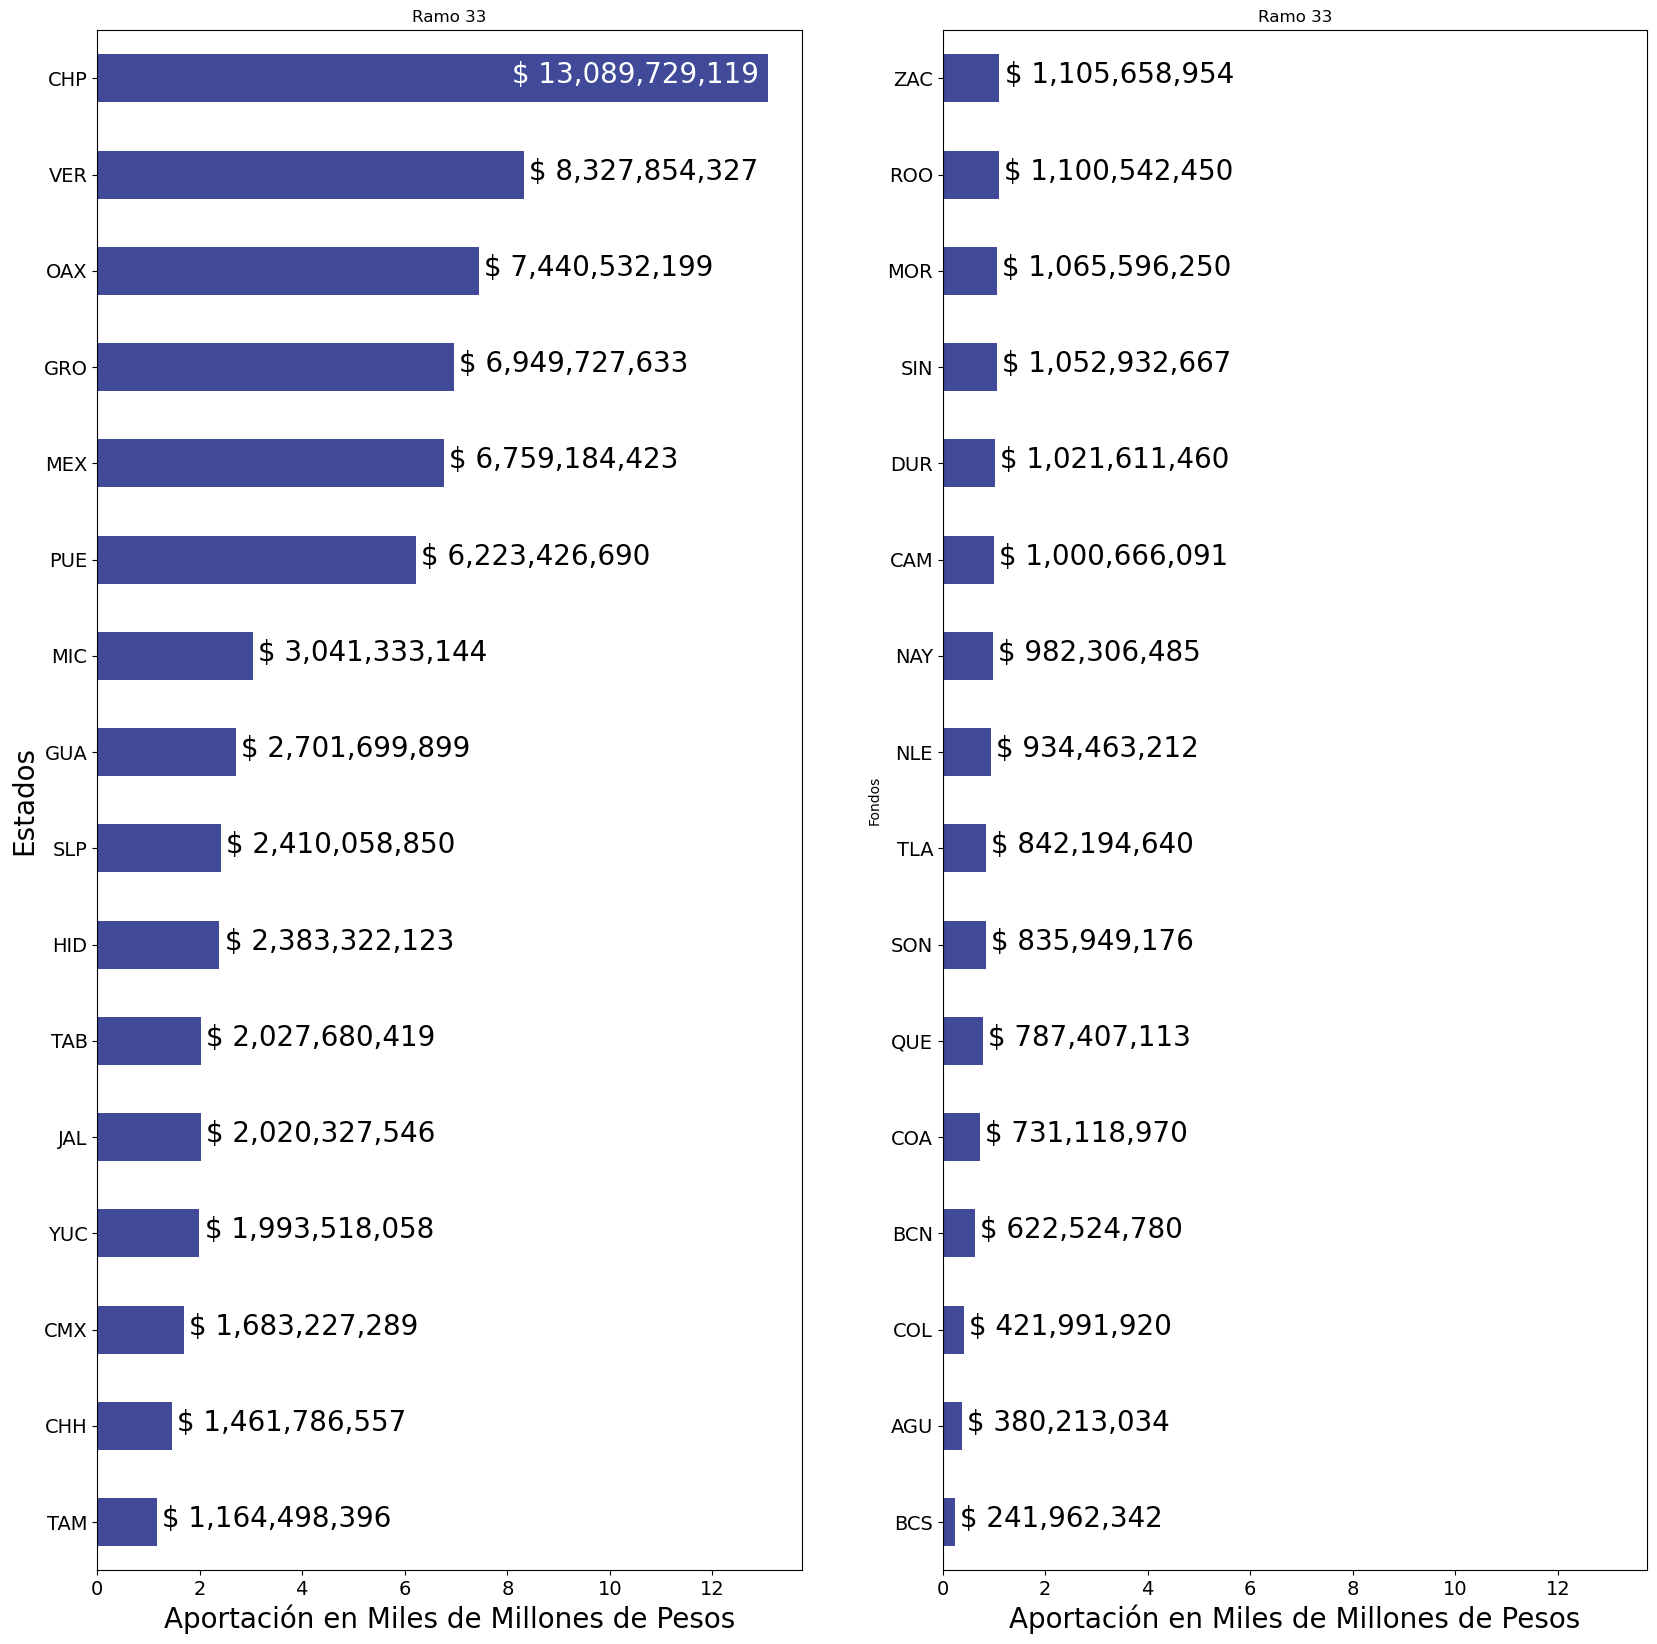

In [149]:
dfr = fis_data.iloc[:16,]
dfl = fis_data.iloc[16:,]


props_r = {
    'orientation' : 'barh',
    'rotation': 0,
    'title': 'Ramo 33',
    'color': colors.vp,
    'xlabel': ' % respecto al total',
    'ylabel': 'Fondos',
    'fontsize': 14
}

props_l = {
    'orientation' : 'barh',
    'rotation': 0,
    'title': 'Ramo 33',
    'color': colors.vp,
    'xlabel': ' % respecto al total',
    'ylabel': 'Fondos',
    'fontsize': 14
}


fis2, ax = plt.subplots(ncols=2, nrows=1, figsize = (20,20),sharex=True)
Plotter.barplot_df(dfl, 'ANUAL MMDP', ax[0], config = props_l, text = 0)

ax[0].set_ylabel('Estados', fontsize = 20)
ax[0].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)
Plotter.barplot_df(dfr, 'ANUAL MMDP', ax[1], config = props_r, text = 0)

ax[1].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)
x_offset = 0.1
y_offset = -0.3

    
for n, p in enumerate(ax[0].patches):
    b = p.get_bbox()
    if n < len(dfl) - 1:
        num = f"$ {int(dfl.iloc[n, 0]):,}"     
        ax[0].annotate(num, (b.x1 + x_offset, b.y1 + y_offset), fontsize =20)
    else:
        num = f"$ {int(dfl.iloc[n, 0]):,}"     
        ax[0].annotate(num, (b.x1 - 50 * x_offset, b.y1 + y_offset), fontsize = 20, color = 'white')

# fis2.suptitle('Porcentaje de Aportaciones Federales y Montos', fontsize = 20)
for n, p in enumerate(ax[1].patches):
    b = p.get_bbox()
    num = f"$ {int(dfr.iloc[n, 0]):,}"   
    ax[1].annotate(num, (b.x1 + x_offset, b.y1 + y_offset), fontsize = 20)

(9000, 0.5)

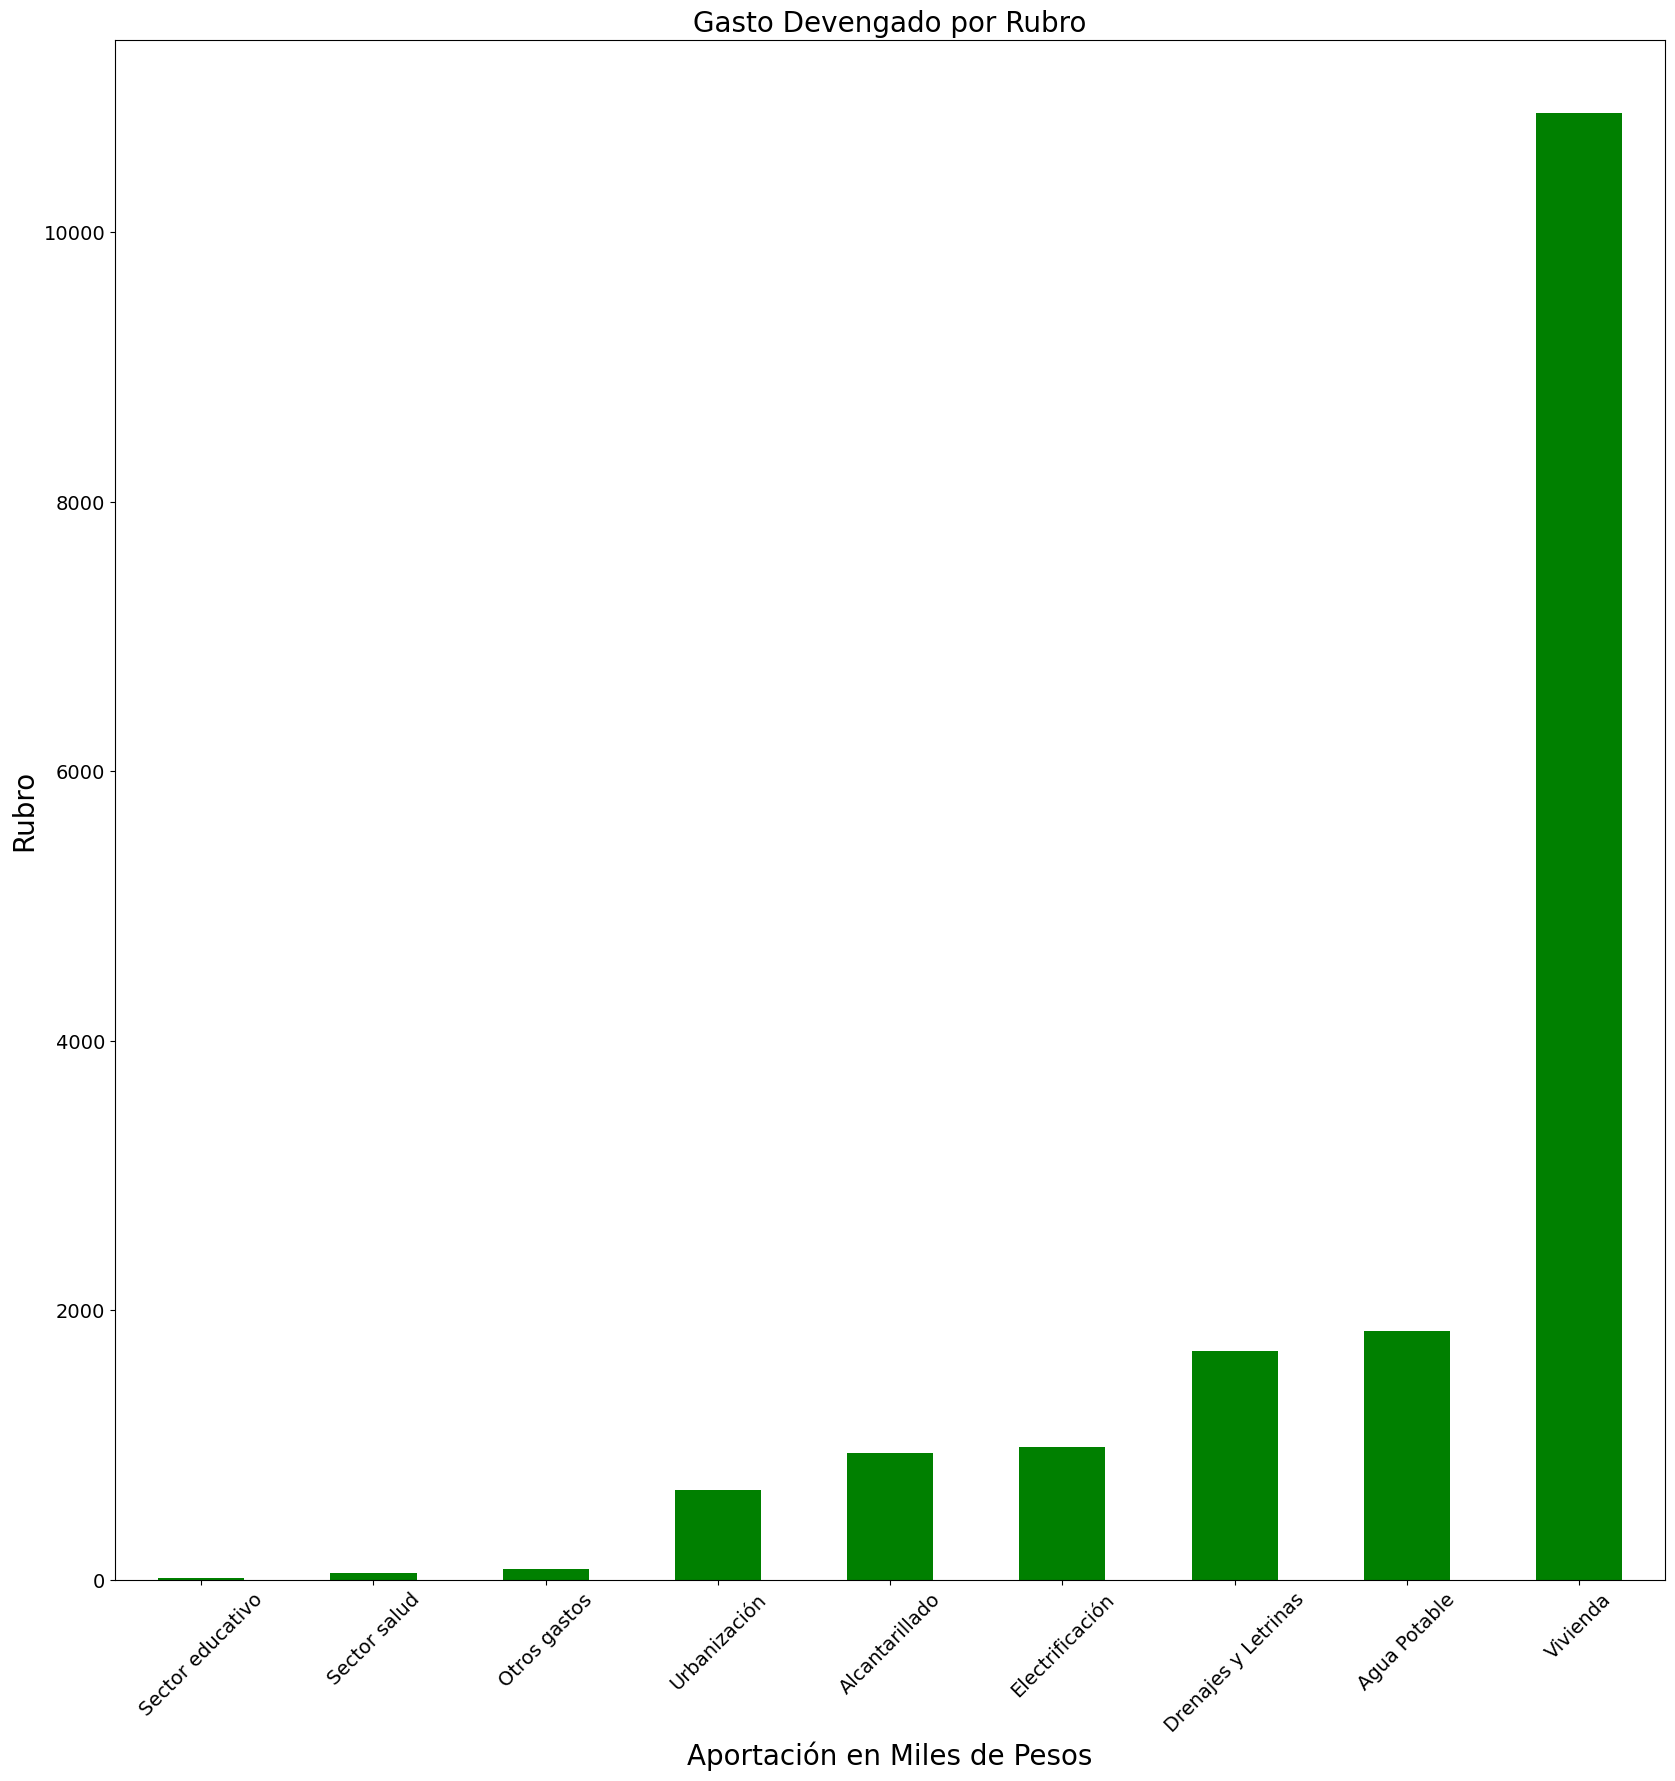

In [150]:
def text_block(content, pos, ax):
    ax.annotate(text = content,
                    xy=pos, 
                    fontsize=20,
                    horizontalalignment='center', 
                    verticalalignment='center')
    return pos 

rubro = data['Concentrado']
rubro = rubro.iloc[15:]
rubro = rubro.dropna(how = 'all', axis=1)
rubro.columns = rubro.iloc[0,:]
rubro = rubro.iloc[1:]
rubro['%'] = [round(y * 100, 2) for y in rubro['%'].tolist()]
rubro.reset_index(inplace=True,drop=True)
rubro.set_index('Rubro',drop=True, inplace=True)
rubro_plot = rubro.iloc[:-1, :]




rubro_plot = rubro_plot.sort_values('Devengado')
rubdev, ax = plt.subplots(figsize = (20,20))
rubro_plot['Devengado'] = rubro_plot['Devengado'] / 1000


Plotter.barplot_df(rubro_plot, 'Devengado', ax, text = 0)
ax.set_title("Gasto Devengado por Rubro", fontsize = 20)
ax.set_xlabel('Aportación en Miles de Pesos', fontsize=20)
ax.set_ylabel('Rubro', fontsize=20)
for j, i in enumerate(rubro_plot.index):
    if rubro_plot.loc[i, '%'] > 15:
        text_block(f"{rubro_plot.loc[i, '%']:,} % *",(1e4, j),ax)
    else:
        text_block(f"{rubro_plot.loc[i, '%']:,} %",(rubro_plot.loc[i, 'Devengado'] + 1000, j),ax)
        
text_block("* Los porcentajes son \n respecto al gasto total",(9000, 0.5) ,ax)


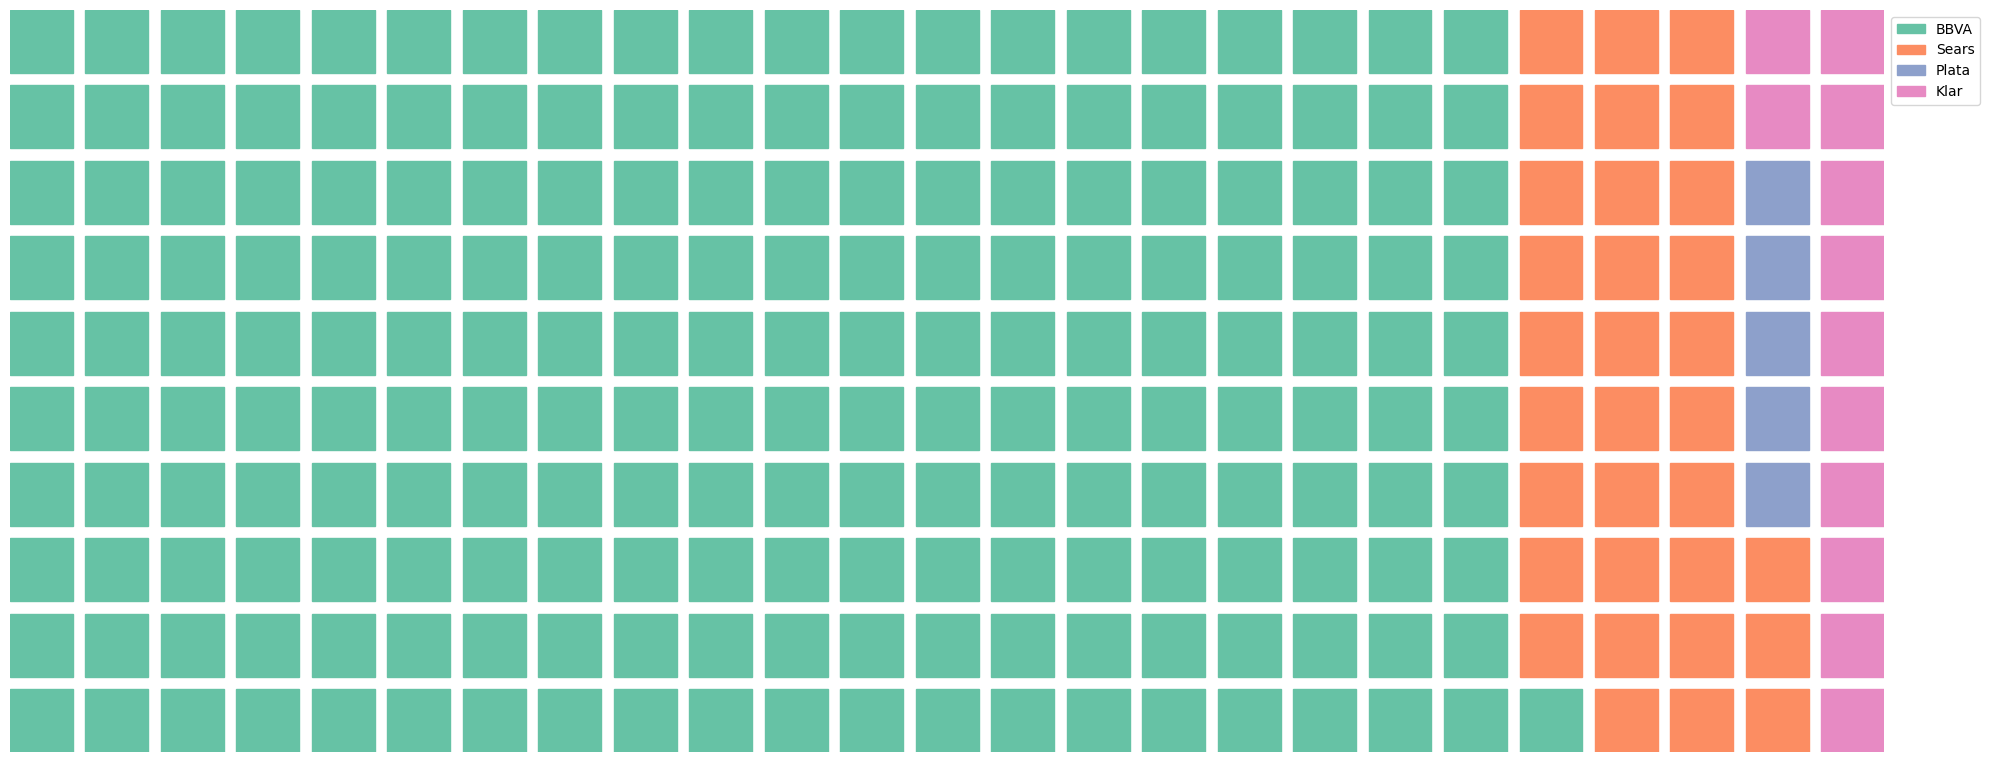

In [151]:
from pywaffle import Waffle

# Data
value = {'BBVA': 100000, 'Sears': 16000, 'Plata':2500, 'Klar': 6000}

# Waffle chart
plt.figure(
    figsize=(20,20),
    FigureClass = Waffle,
    rows = 10,
    columns = 25,
    vertical = False,
    values = value,
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)})
plt.show()

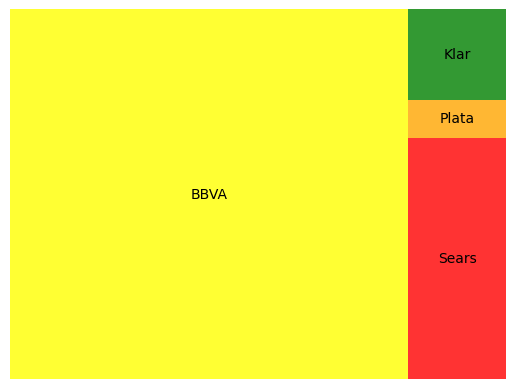

In [152]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
# If you have 2 lists
#squarify.plot(sizes=[13,22,35,5], label=["group A", "group B", "group C", "group D"], alpha=.7 )
#plt.axis('off')
#plt.show()
 
# If you have a data frame
df = pd.DataFrame({'LC':[100000,16000,2500,6000], 'TDC':['BBVA', 'Sears','Plata','Klar'] })
squarify.plot(sizes=df['LC'], label=df['TDC'], alpha=.8, color=['yellow','red','orange','green'])
plt.axis('off')
plt.show() 

# Grafica de Pastel (Remplazada)

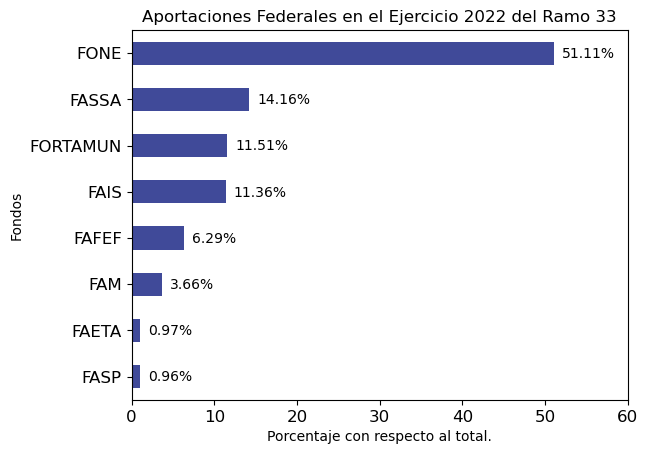

In [153]:
ramo33, ax = plt.subplots()
fondos_mt.sort_values('Monto',inplace=True)

config_1 = {
    
}


fondos_mt['%'].plot(kind='barh', color = colors.vp, xlim = [0,60],
                         ylabel='Fondos', xlabel='Porcentaje con respecto al total.',fontsize=12, ax = ax)
x_offset = 1
y_offset = -0.35
plt.title('Aportaciones Federales en el Ejercicio 2022 del Ramo 33')
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.x1 + b.x0) + '%'      
    ax.annotate(val, (b.x1 + x_offset, b.y1 + y_offset))

## Estados

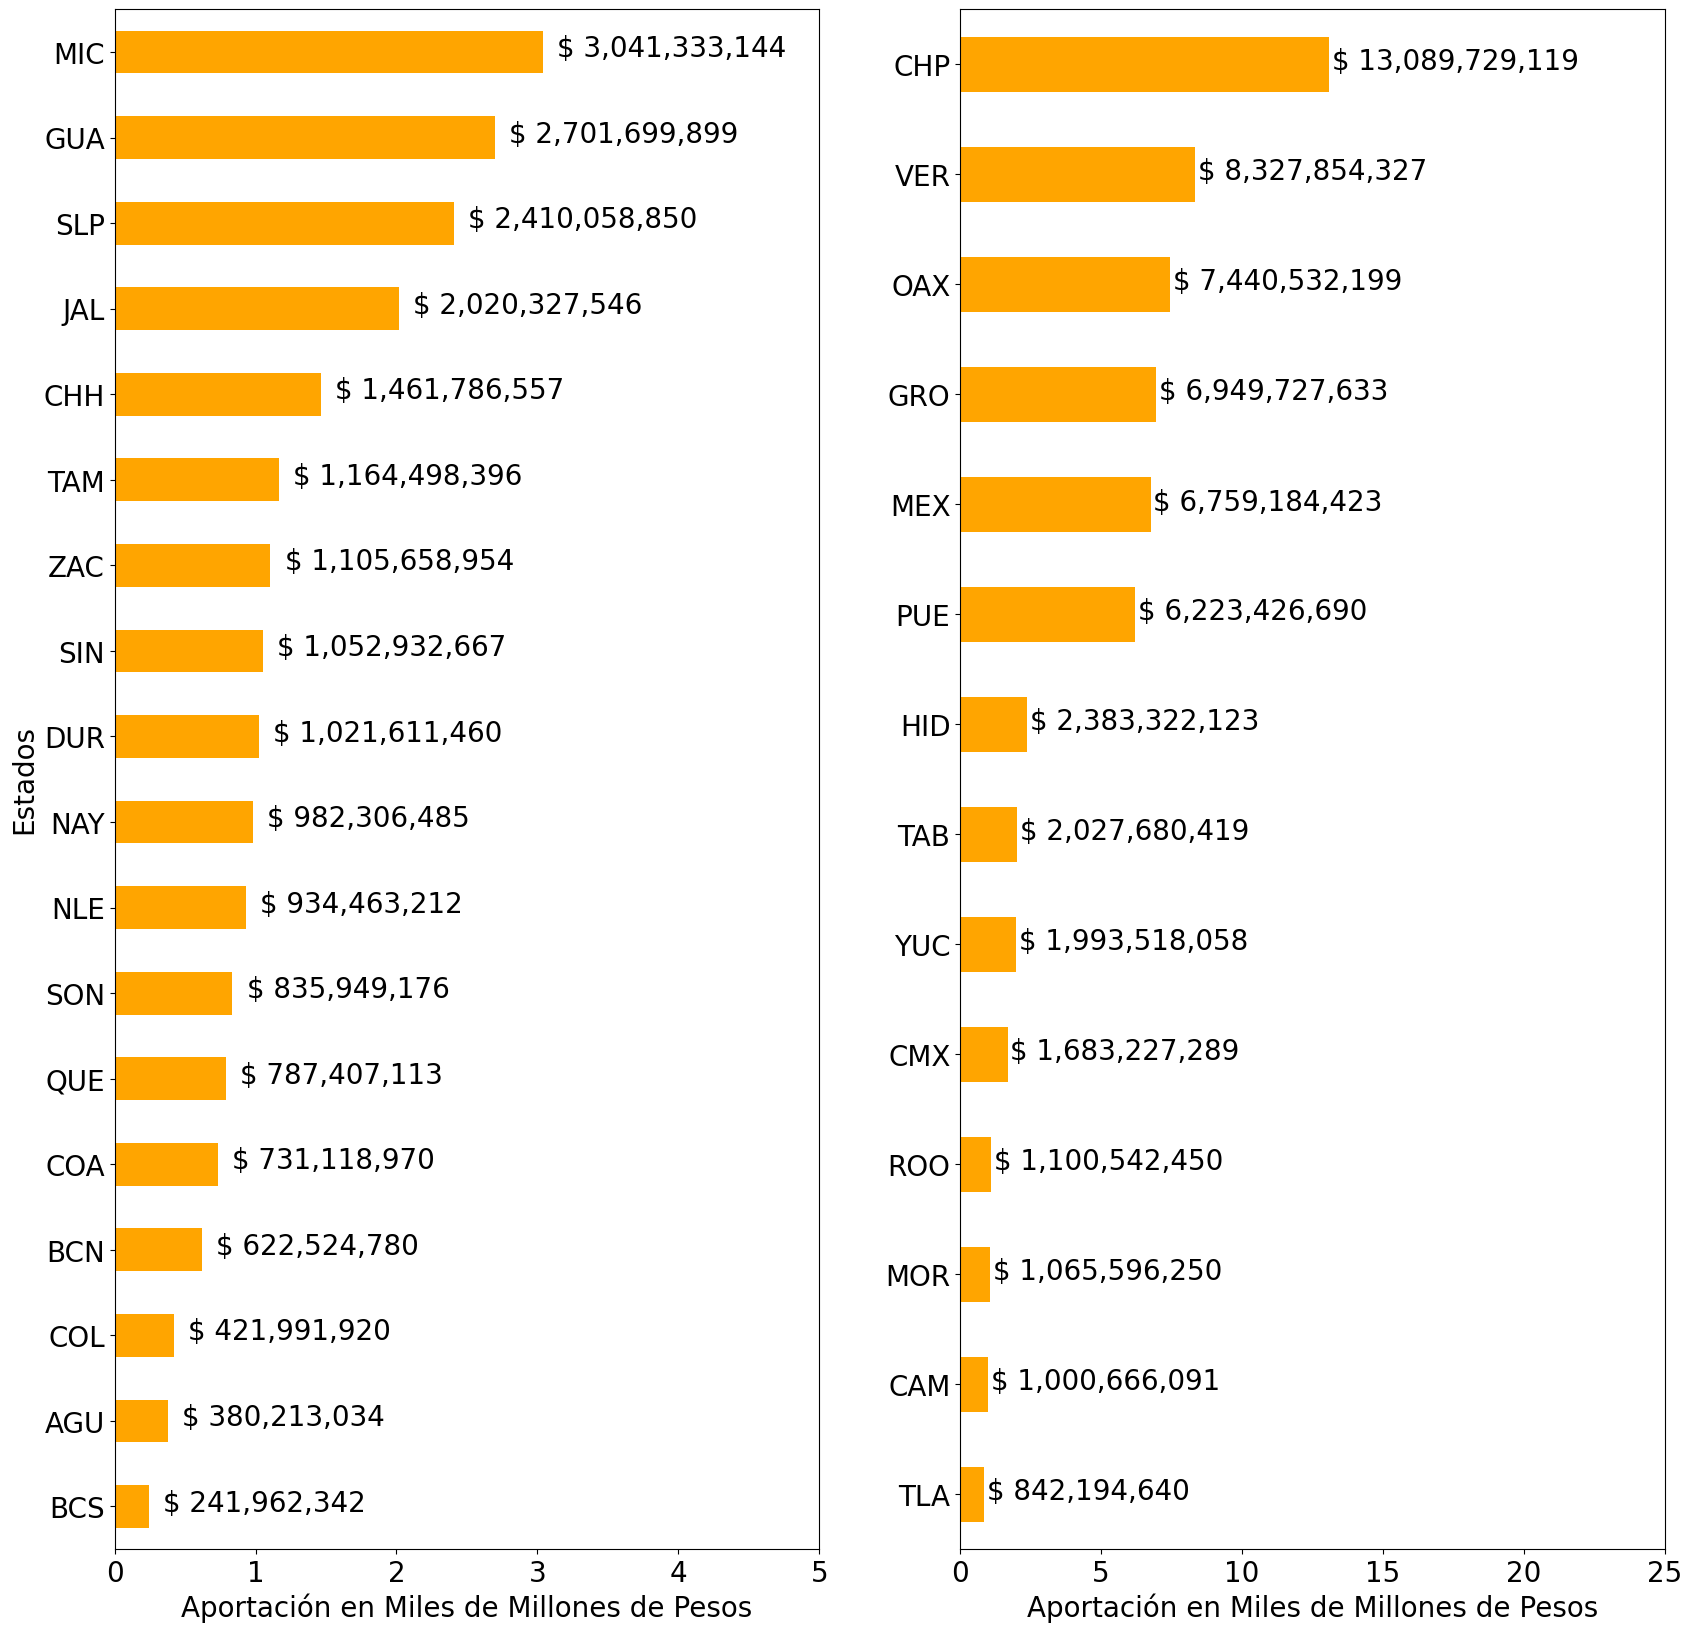

In [154]:

color_test = 'orange'
cmap_test = 'viridis'

dfl = fis_data.loc[region_norte + region_occidente]
dfr = fis_data.loc[region_oriente + region_sur]
dfl.sort_values('ANUAL MMDP', inplace=True)
dfr.sort_values('ANUAL MMDP', inplace=True)
fis2, ax = plt.subplots(ncols=2, nrows=1, figsize = (20,20))
dfl['ANUAL MMDP'].plot(kind='barh',
                      color = color_test,
                      ax = ax[0],
                      fontsize=20,
                      xlim = [0,5])
ax[0].set_ylabel('Estados', fontsize = 20)
ax[0].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)
dfr['ANUAL MMDP'].plot(kind='barh',
                      color = color_test,
                      ax = ax[1],
                      ylabel='',
                      fontsize=20,
                      xlim = [0,25])
ax[1].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)
x_offset = 0.1
y_offset = -0.3

for n, p in enumerate(ax[0].patches):
    b = p.get_bbox()
    num = f"$ {int(dfl.iloc[n, 0]):,}"     
    ax[0].annotate(num, (b.x1 + x_offset, b.y1 + y_offset), fontsize = 20)

# fis2.suptitle('Porcentaje de Aportaciones Federales y Montos', fontsize = 20)
for n, p in enumerate(ax[1].patches):
    b = p.get_bbox()
    num = f"$ {int(dfr.iloc[n, 0]):,}"   
    ax[1].annotate(num, (b.x1 + x_offset, b.y1 + y_offset), fontsize = 20)


# Municipios

In [155]:
fis_mun = data['Hoja5']
fis_mun = fis_mun.iloc[3:-1,1:]
fis_mun.columns = fis_mun.iloc[0,:]
fis_mun = fis_mun.iloc[1:,]
fis_mun.reset_index(drop=True,inplace=True)
mun_t = fis_mun.iloc[-1,1]
fis_mun['ANUAL %'] = fis_mun['ANUAL'] / mun_t * 100
fis_mun_data = fis_mun[['MUNICIPIOS','ANUAL','ANUAL %']].copy()
fis_mun_data['ANUAL MDP'] = fis_mun_data['ANUAL'] / 1e6
cvegeo_mun = [str(26001 + i) for i in range(72)]
fis_mun_data['CVEGEO']  = cvegeo_mun + ['*']


muni = pd.read_excel('plot_data\\absolute.xlsx')
munici = list(muni['Unnamed: 0'])
fis_mun_data['MUNICIPIOS'] = list(munici) + ['*']
fis_mun_data.sort_values('ANUAL',inplace=True)
fis_mun_data['CV2'] = [s[3:] for s in fis_mun_data['CVEGEO']]
fis_mun_data

3,MUNICIPIOS,ANUAL,ANUAL %,ANUAL MDP,CVEGEO,CV2
54,San Luis Río Colorado,219818,0.026296,0.219818,26055,55
47,Puerto Peñasco,250599,0.029978,0.250599,26048,48
35,Magdalena,259611,0.031056,0.259611,26036,36
6,Atil,280533,0.033559,0.280533,26007,07
56,San Pedro de la Cueva,408836,0.048907,0.408836,26057,57
...,...,...,...,...,...,...
26,Fronteras,62917072,7.526423,62.917072,26027,27
18,Cananea,64155702,7.674594,64.155702,26019,19
43,Onavas,77224305,9.237919,77.224305,26044,44
31,Huásabas,131850628,15.772565,131.850628,26032,32


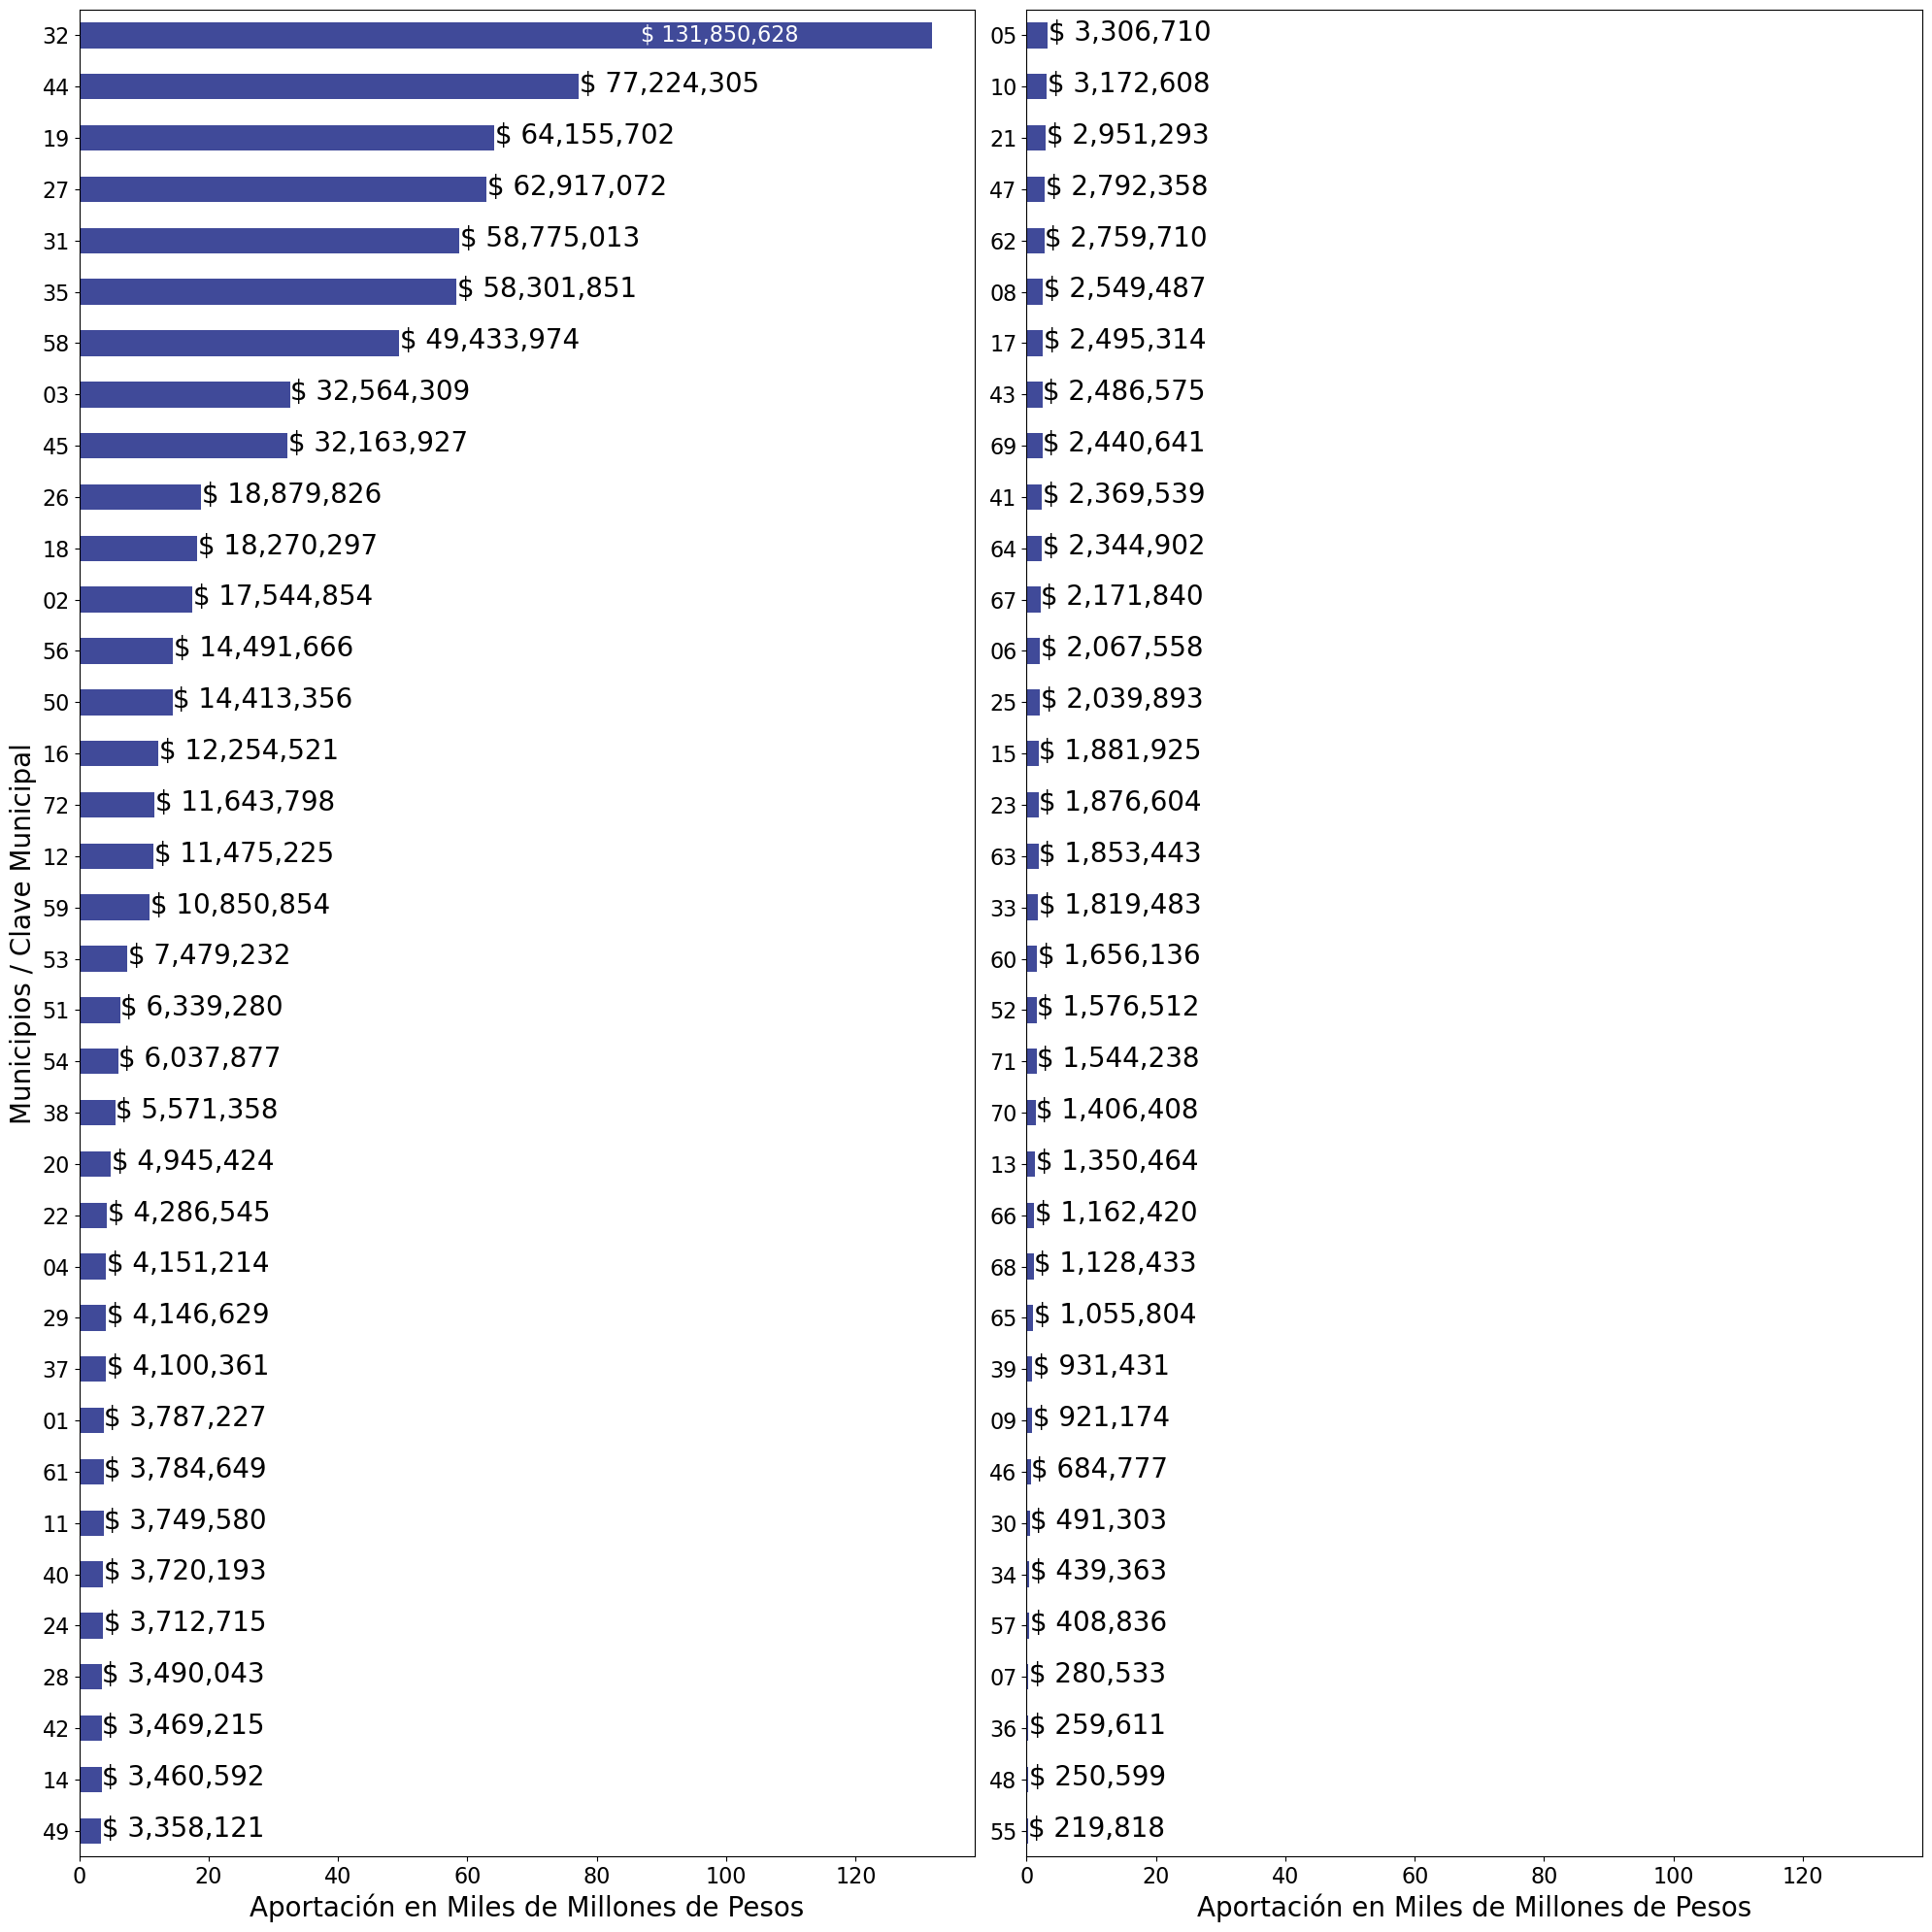

In [156]:
dfl = fis_mun_data.iloc[:36,]
dfr = fis_mun_data.iloc[36:-1,]

dfl.set_index('CV2',inplace=True)
dfr.set_index('CV2',inplace=True)
fis2, ax = plt.subplots(ncols=2, nrows=1, figsize = (20,20),sharex=True)
dfr['ANUAL MDP'].plot(kind='barh',
                      color = colors.vp,
                      ax = ax[0],
                      fontsize=16)
ax[0].set_ylabel('Municipios / Clave Municipal', fontsize = 20)
ax[0].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)
# ax[0].set_yticklabels(labels = dfr.index, horizontalalignment = 'right')
dfl['ANUAL MDP'].plot(kind='barh',
                      color = colors.vp,
                      ax = ax[1],
                      ylabel='',
                      fontsize=16)
ax[1].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)
# ax[1].set_yticklabels(labels = dfl.index, horizontalalignment = 'rigth')
x_offset = 0.1
y_offset = -0.36

for n, p in enumerate(ax[1].patches):
    b = p.get_bbox()
    num = f"$ {int(dfl.iloc[n, 1]):,}"     
    ax[1].annotate(num, (b.x1 + x_offset, b.y1 + y_offset), fontsize = 20)

# fis2.suptitle('Porcentaje de Aportaciones Federales y Montos', fontsize = 20)
for n, p in enumerate(ax[0].patches):
    b = p.get_bbox()
 
    if n == len(dfr) - 1:
        num = f"$ {int(dfr.iloc[n, 1]):,}"   
        ax[0].annotate(num, (b.x1 - 450 * x_offset, b.y1 + y_offset), fontsize = 16, color = 'white')
    else:    
        num = f"$ {int(dfr.iloc[n, 1]):,}"   
        ax[0].annotate(num, (b.x1 + x_offset, b.y1 + y_offset), fontsize = 20)
plt.tight_layout()
# plt.suptitle('Aportaciones Municipales del FAISM')


In [157]:
tabla_vp = pd.read_excel('plot_data\\tablavp.xlsx')

tabla_vp.set_index('Estado',drop=True, inplace=True)
tabla_vp['dAbs'] = tabla_vp['dPY'].abs()
tabla_vp['color'] = ['green' if u >= 0 else 'red' for u in tabla_vp['dPY']]
tabla_vp.sort_values('AC', ascending=True, inplace=True)
tabla_s = tabla_vp.copy()

abreviaturas = pd.read_excel('plot_data\\Abreviaturas.xlsx')

abreviaturas['NEW'] = [s[3:] for s in abreviaturas['Abreviatura']]

abreviaturas['Estado'] = abreviaturas['Estado'].str.replace('Estado de ', '')
abreviaturas.iloc[4,0] = 'Coahuila'
abreviaturas.iloc[23,0] = 'San Luís Potosí'
abreviaturas.iloc[21,0] = 'Queretaro'
abreviaturas.iloc[8,0] = 'Cuidad de México'

f = [list(abreviaturas['Estado']).index(u) for u in tabla_s.index]

tabla_s['ABR'] = [list(abreviaturas['NEW'])[q] for q in f]
tabla_s.set_index('ABR',drop=True, inplace=True)

tabla_vp = tabla_s.iloc[:16,]
tabla_vp2 = tabla_s.iloc[16:,]


In [158]:
tabla_pos1 = pd.DataFrame(index = tabla_vp2.index, columns=['A','clase','color'])
tabla_neg1 = pd.DataFrame(index = tabla_vp2.index, columns=['A','clase','color'])
tabla_pos2 = pd.DataFrame(index = tabla_vp.index, columns = ['A','clase','color'])
tabla_neg2 = pd.DataFrame(index = tabla_vp.index, columns = ['A','clase','color'])

for estado in tabla_vp2.index:
    if tabla_vp2.loc[estado,'dPY'] >= 0:
        tabla_pos1.loc[estado,:] = [tabla_vp2.loc[estado, 'AC'], 'AC','green']
        tabla_neg1.loc[estado,:] = [tabla_vp2.loc[estado, 'PY'], 'dPY','red']
    else:
        tabla_pos1.loc[estado,:] = [tabla_vp2.loc[estado, 'PY'], 'dPY','red']
        tabla_neg1.loc[estado,:] = [tabla_vp2.loc[estado, 'AC'], 'AC','green']
for estado in tabla_vp.index:
    if tabla_vp.loc[estado,'dPY'] >= 0:
        tabla_pos2.loc[estado,:] = [tabla_vp.loc[estado, 'AC'], 'AC','green']
        tabla_neg2.loc[estado,:] = [tabla_vp.loc[estado, 'PY'], 'dPY','red']
    else:
        tabla_pos2.loc[estado,:] = [tabla_vp.loc[estado, 'PY'], 'dPY','red']
        tabla_neg2.loc[estado,:] = [tabla_vp.loc[estado, 'AC'], 'AC','green']
tabla_pos1.head()

,A,clase,color
ABR,,,
ROO,93.6,AC,green
MOR,94.5,AC,green
COL,95.0,AC,green
GUA,95.5,AC,green
MEX,98.1,dPY,red


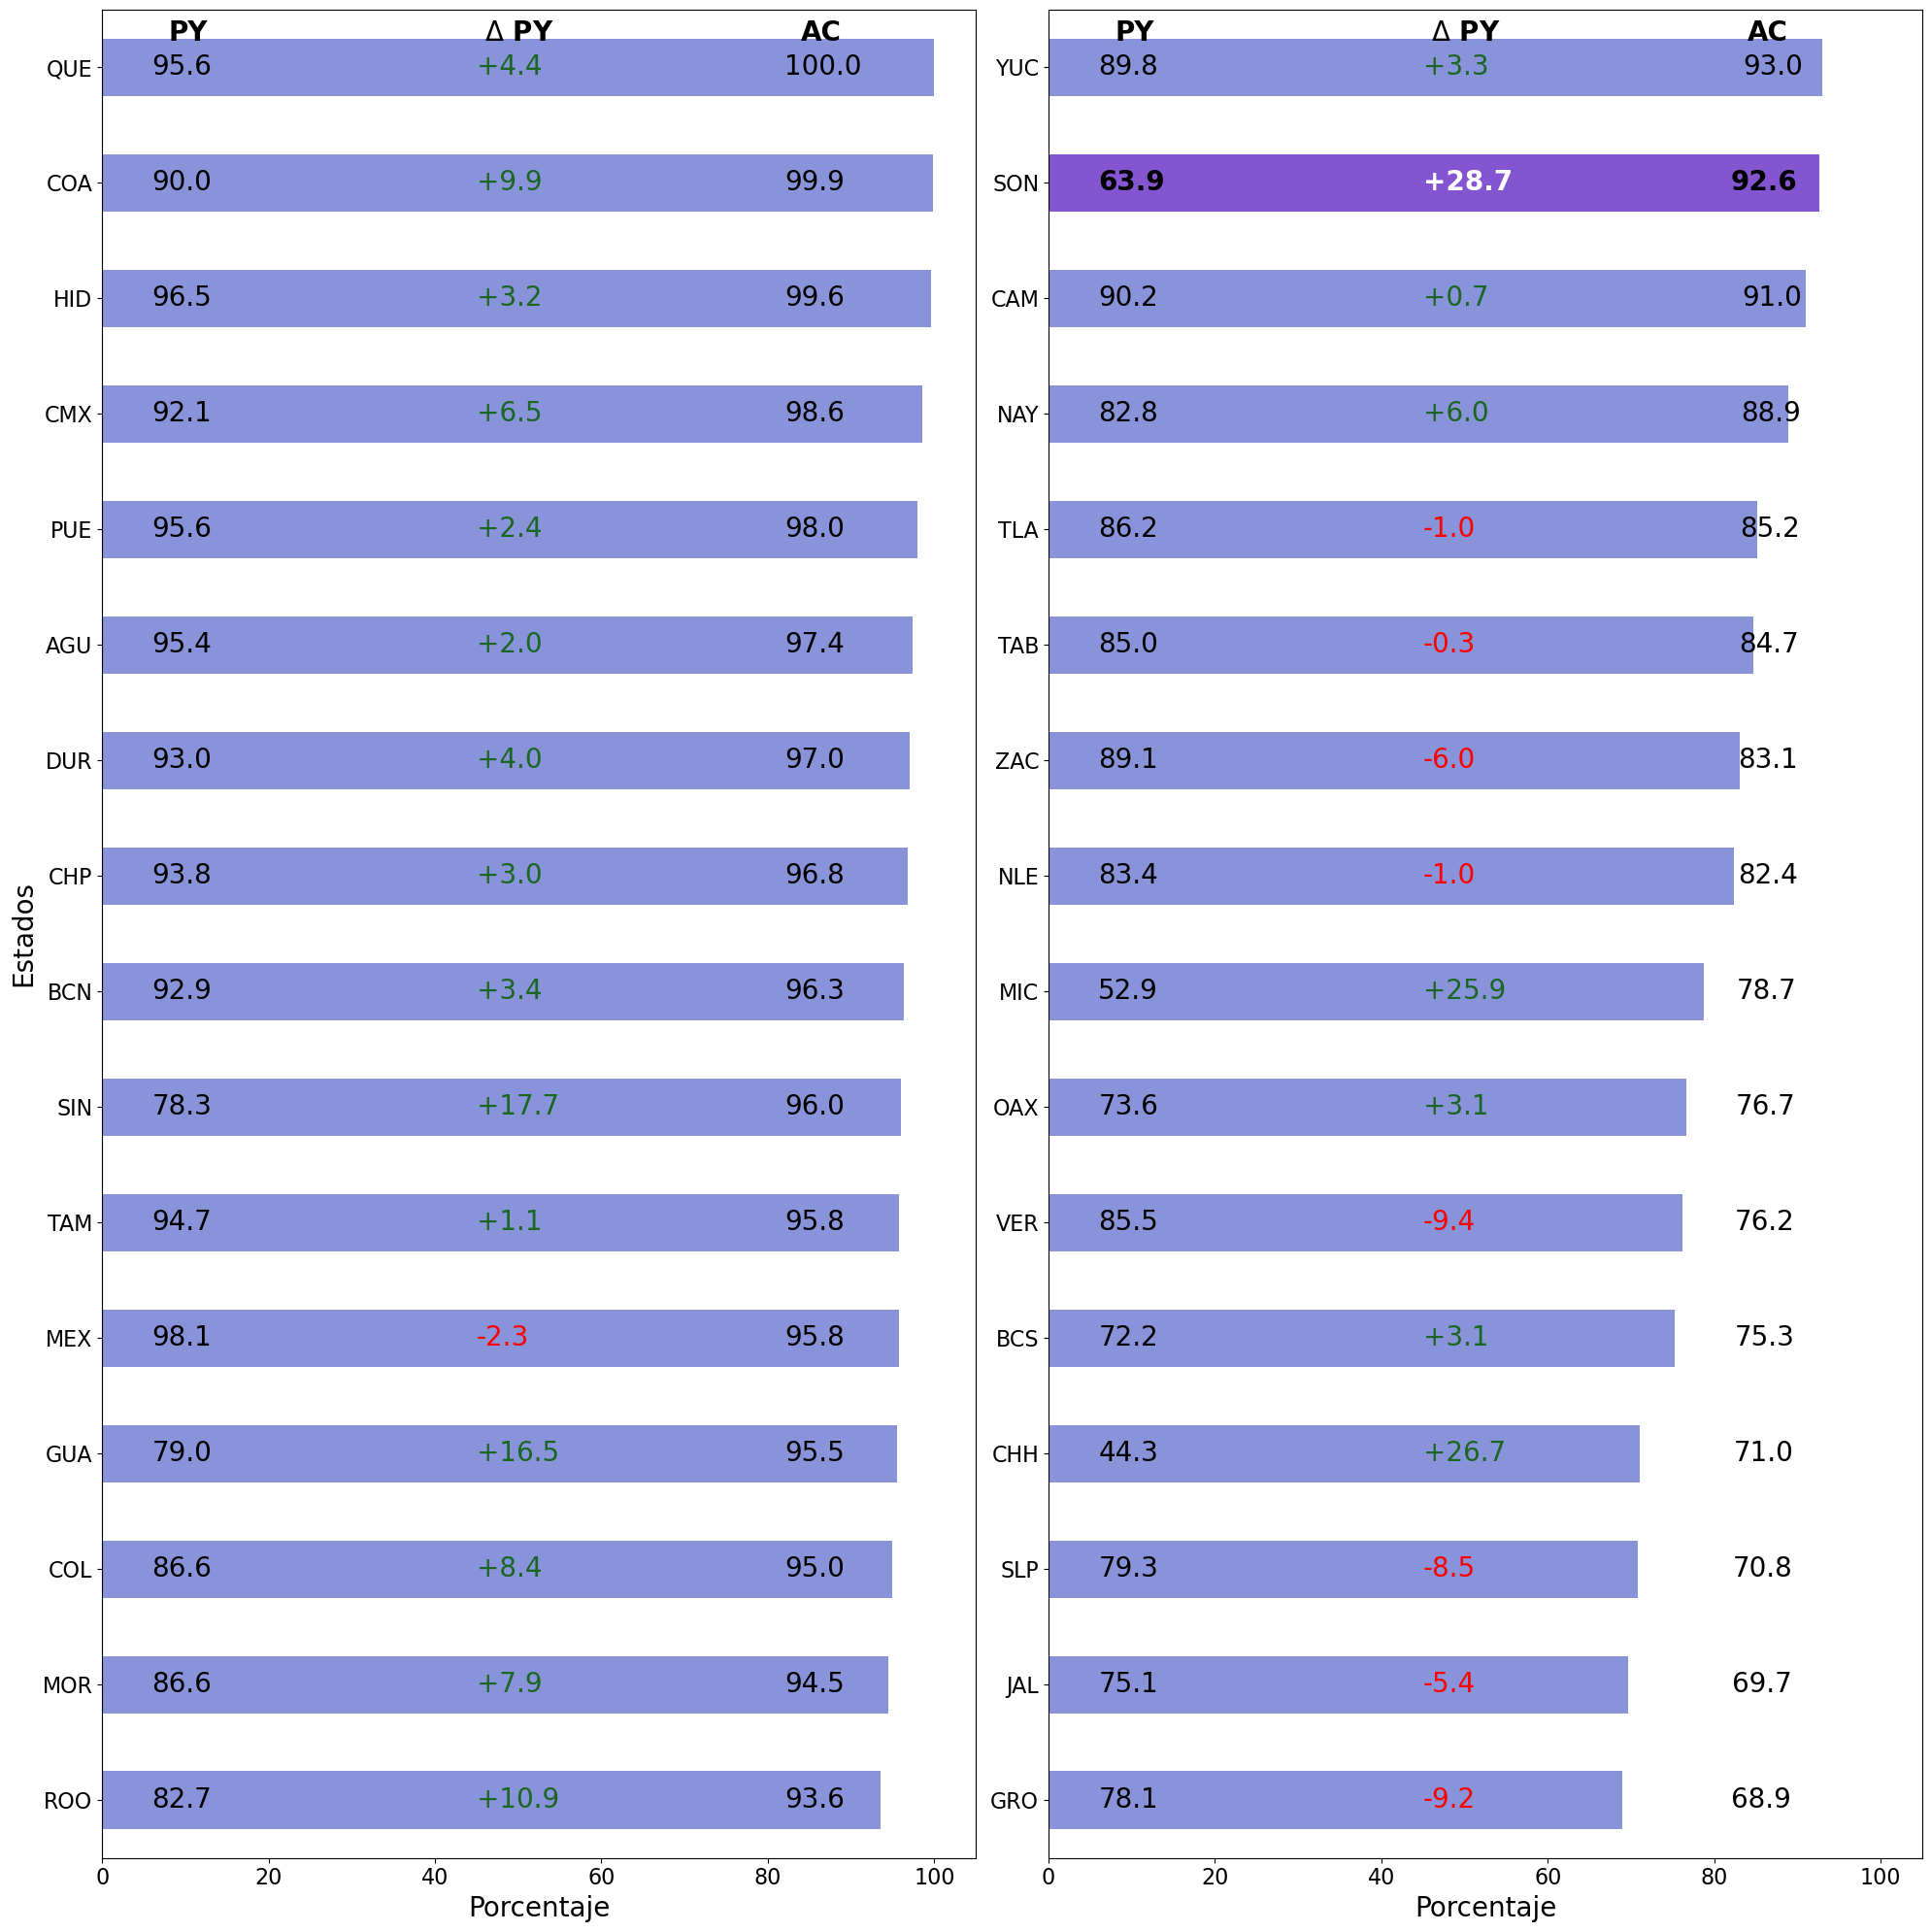

In [159]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (20,20), sharex=True)




tabla_vp2['AC'].plot(kind='barh', color = color_2, fontsize=16, ax = ax[0])
ax[0].annotate(text = 'PY',
                        xy=(8, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[0].annotate(text = r'$\Delta$ PY',
                        xy=(46, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[0].annotate(text = 'AC',
                        xy=(84, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')


color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp2['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp2['dPY']]
for k, estado in enumerate(tabla_vp2.index):
    ax[0].annotate(text = tabla_vp2.loc[estado, 'PY'],
                        xy=(6, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    ax[0].annotate(text = text_t[k],
                        xy=(45, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        color = color_t[k])
    ax[0].annotate(text = tabla_vp2.loc[estado, 'AC'],
                        xy=(82, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
tabla_vp['AC'].plot(kind='barh', color = [color_2 for i in range(14)] + [color_3, color_2], fontsize=16, ax = ax[1])


ax[1].annotate(text = 'PY',
                        xy=(8, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[1].annotate(text = r'$\Delta$ PY',
                        xy=(46, 15.3), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')
ax[1].annotate(text = 'AC',
                        xy=(84, 15.3), 
                        fontsize= 20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        weight = 'bold')


color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp['dPY']]
for k, estado in enumerate(tabla_vp.index):
    if estado == 'SON':
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', weight = 'bold')
        ax[1].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = 'white', weight = 'bold')
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(82, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', weight = 'bold')
    else:
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
        ax[1].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = color_t[k])
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(82 + k/10, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
        
ax[0].set_xlabel('Porcentaje', fontsize = 20)
ax[0].set_ylabel('Estados', fontsize = 20)
ax[1].set_ylabel('', fontsize = 20)
ax[1].set_xlabel('Porcentaje', fontsize = 20)
plt.tight_layout()

# Graficas Articulo P2

In [160]:
file_vp = pd.read_excel('plot_data\\tablavp.xlsx',sheet_name=None)
sheets = list(file_vp.keys())

tabla_vp = file_vp['Contenido Contable']

tabla_vp.set_index('Estado',drop=True, inplace=True)
tabla_vp['dAbs'] = tabla_vp['dPY'].abs()
tabla_vp['color'] = ['green' if u >= 0 else 'red' for u in tabla_vp['dPY']]
tabla_vp.sort_values('AC', ascending=True, inplace=True)
tabla_s = tabla_vp.copy()

abreviaturas = pd.read_excel('plot_data\\Abreviaturas.xlsx')

abreviaturas['NEW'] = [s[3:] for s in abreviaturas['Abreviatura']]

abreviaturas['Estado'] = abreviaturas['Estado'].str.replace('Estado de ', '')
abreviaturas.iloc[4,0] = 'Coahuila'
abreviaturas.iloc[23,0] = 'San Luís Potosí'
abreviaturas.iloc[21,0] = 'Queretaro'
abreviaturas.iloc[8,0] = 'Cuidad de México'

f = [list(abreviaturas['Estado']).index(u) for u in tabla_s.index]

tabla_s['ABR'] = [list(abreviaturas['NEW'])[q] for q in f]

tabla_s.set_index('ABR',drop=True, inplace=True)
tabla_s



tabla_vp = tabla_s.iloc[:16,]
tabla_vp2 = tabla_s.iloc[16:,]

def py_d_ac(ax):
    ax.annotate(text = 'PY',
                            xy=(8, 15.3), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            weight = 'bold')
    ax.annotate(text = r'$\Delta$ PY',
                            xy=(46, 15.3), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            weight = 'bold')
    ax.annotate(text = 'AC',
                            xy=(72, 15.3), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            weight = 'bold')

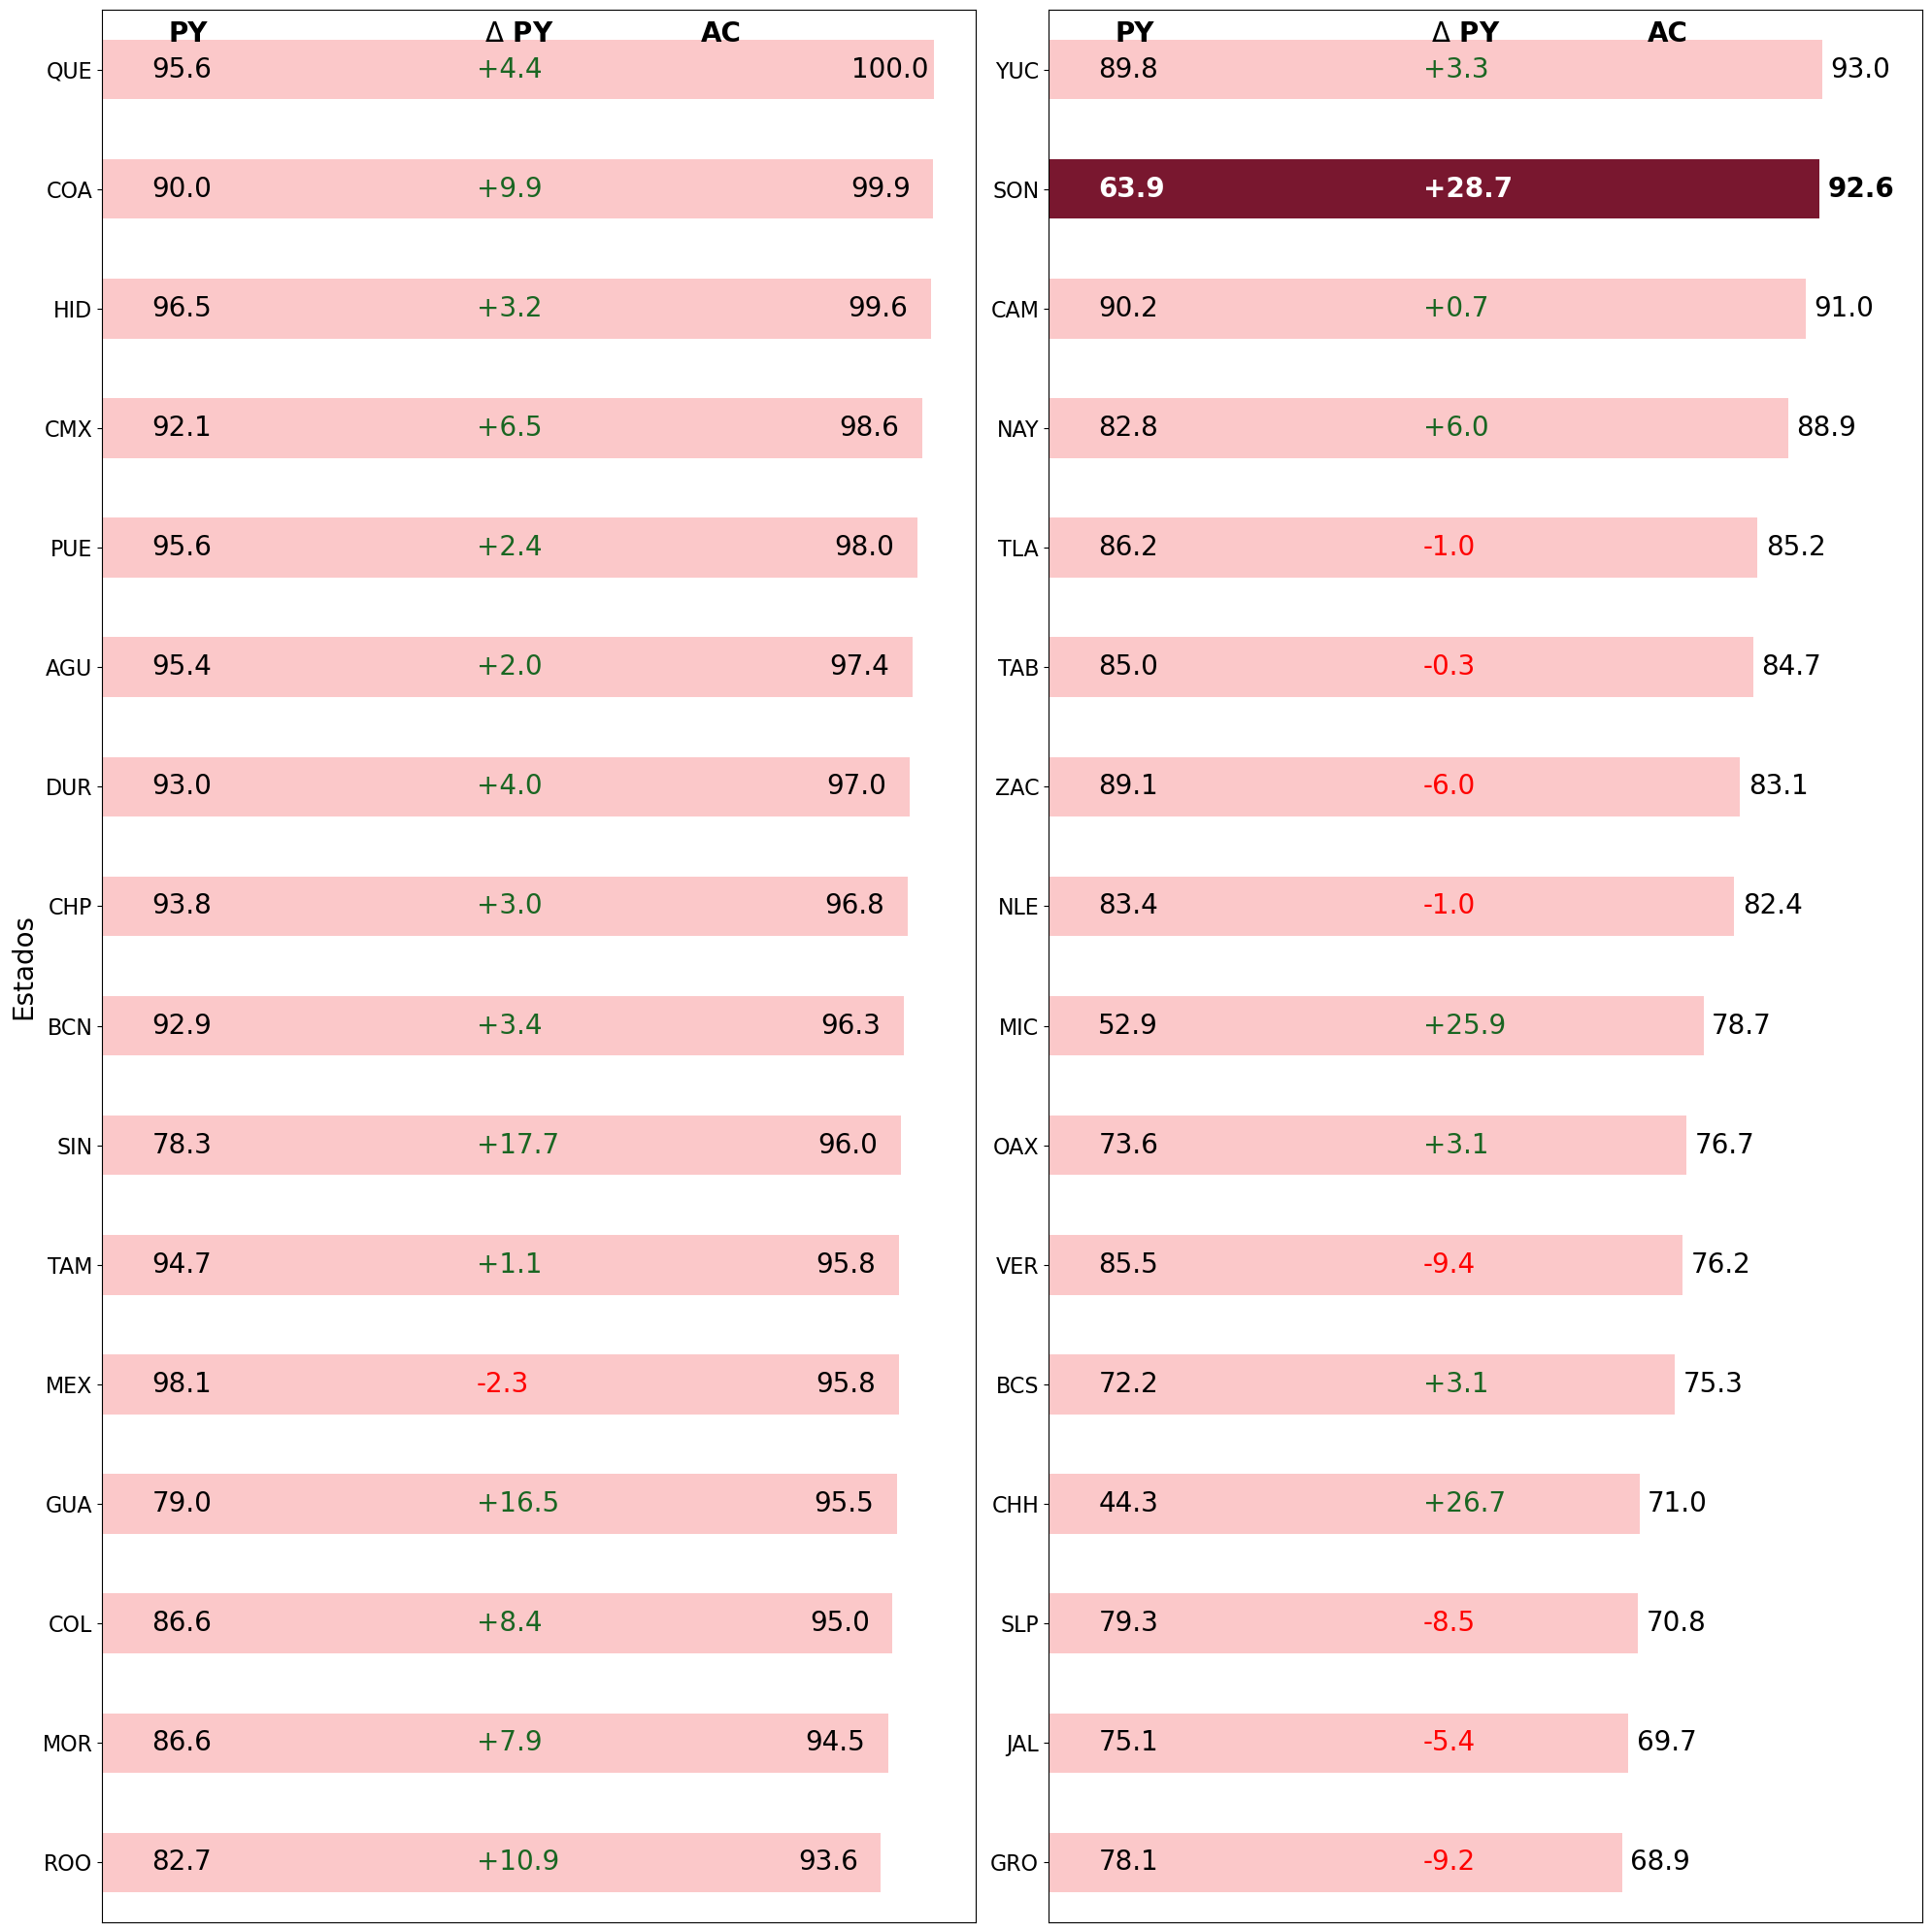

In [161]:



fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (20,20), sharex=True)
tabla_vp2['AC'].plot(kind='barh', color = "#FBC8C9", fontsize=16, ax = ax[0])
py_d_ac(ax[0])

color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp2['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp2['dPY']]
for k, estado in enumerate(tabla_vp2.index):
    ax[0].annotate(text = tabla_vp2.loc[estado, 'PY'],
                        xy=(6, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    ax[0].annotate(text = text_t[k],
                        xy=(45, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        color = color_t[k])
    ax[0].annotate(text = tabla_vp2.loc[estado, 'AC'],
                        xy=(tabla_vp2.loc[estado, 'AC'] - 10, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    


tabla_vp['AC'].plot(kind='barh', color = ["#FBC8C9" for i in range(14)] + ["#79172F", "#FBC8C9"], fontsize=16, ax = ax[1])
py_d_ac(ax[1])


color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp['dPY']]
for k, estado in enumerate(tabla_vp.index):
    if estado == 'SON':
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', color = 'white', weight = 'bold')
        ax[1].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = 'white', weight = 'bold')
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(tabla_vp.loc[estado, 'AC'] + 1, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', weight = 'bold')
    else:
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
        ax[1].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = color_t[k])
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(tabla_vp.loc[estado, 'AC'] + 1, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
ax[0].axes.get_xaxis().set_visible(False)
ax[1].axes.get_xaxis().set_visible(False)
ax[0].set_xlabel('Porcentaje', fontsize = 20)
ax[0].set_ylabel('Estados', fontsize = 20)
ax[1].set_ylabel('', fontsize = 20)
ax[1].set_xlabel('Porcentaje', fontsize = 20)
plt.tight_layout()

In [162]:
tabla_vp = file_vp['Contenido Presupuestal']

tabla_vp.set_index('Estado',drop=True, inplace=True)
tabla_vp['dAbs'] = tabla_vp['dPY'].abs()
tabla_vp['color'] = ['green' if u >= 0 else 'red' for u in tabla_vp['dPY']]
tabla_vp.sort_values('AC', ascending=True, inplace=True)
tabla_s = tabla_vp.copy()

abreviaturas = pd.read_excel('plot_data\\Abreviaturas.xlsx')

abreviaturas['NEW'] = [s[3:] for s in abreviaturas['Abreviatura']]

abreviaturas['Estado'] = abreviaturas['Estado'].str.replace('Estado de ', '')
abreviaturas.iloc[4,0] = 'Coahuila'
abreviaturas.iloc[23,0] = 'San Luis Potosi'
abreviaturas.iloc[21,0] = 'Queretaro'

f = [list(abreviaturas['Estado']).index(u) for u in tabla_s.index]

tabla_s['ABR'] = [list(abreviaturas['NEW'])[q] for q in f]

tabla_s.set_index('ABR',drop=True, inplace=True)
tabla_s



tabla_vp = tabla_s.iloc[:16,]
tabla_vp2 = tabla_s.iloc[16:,]

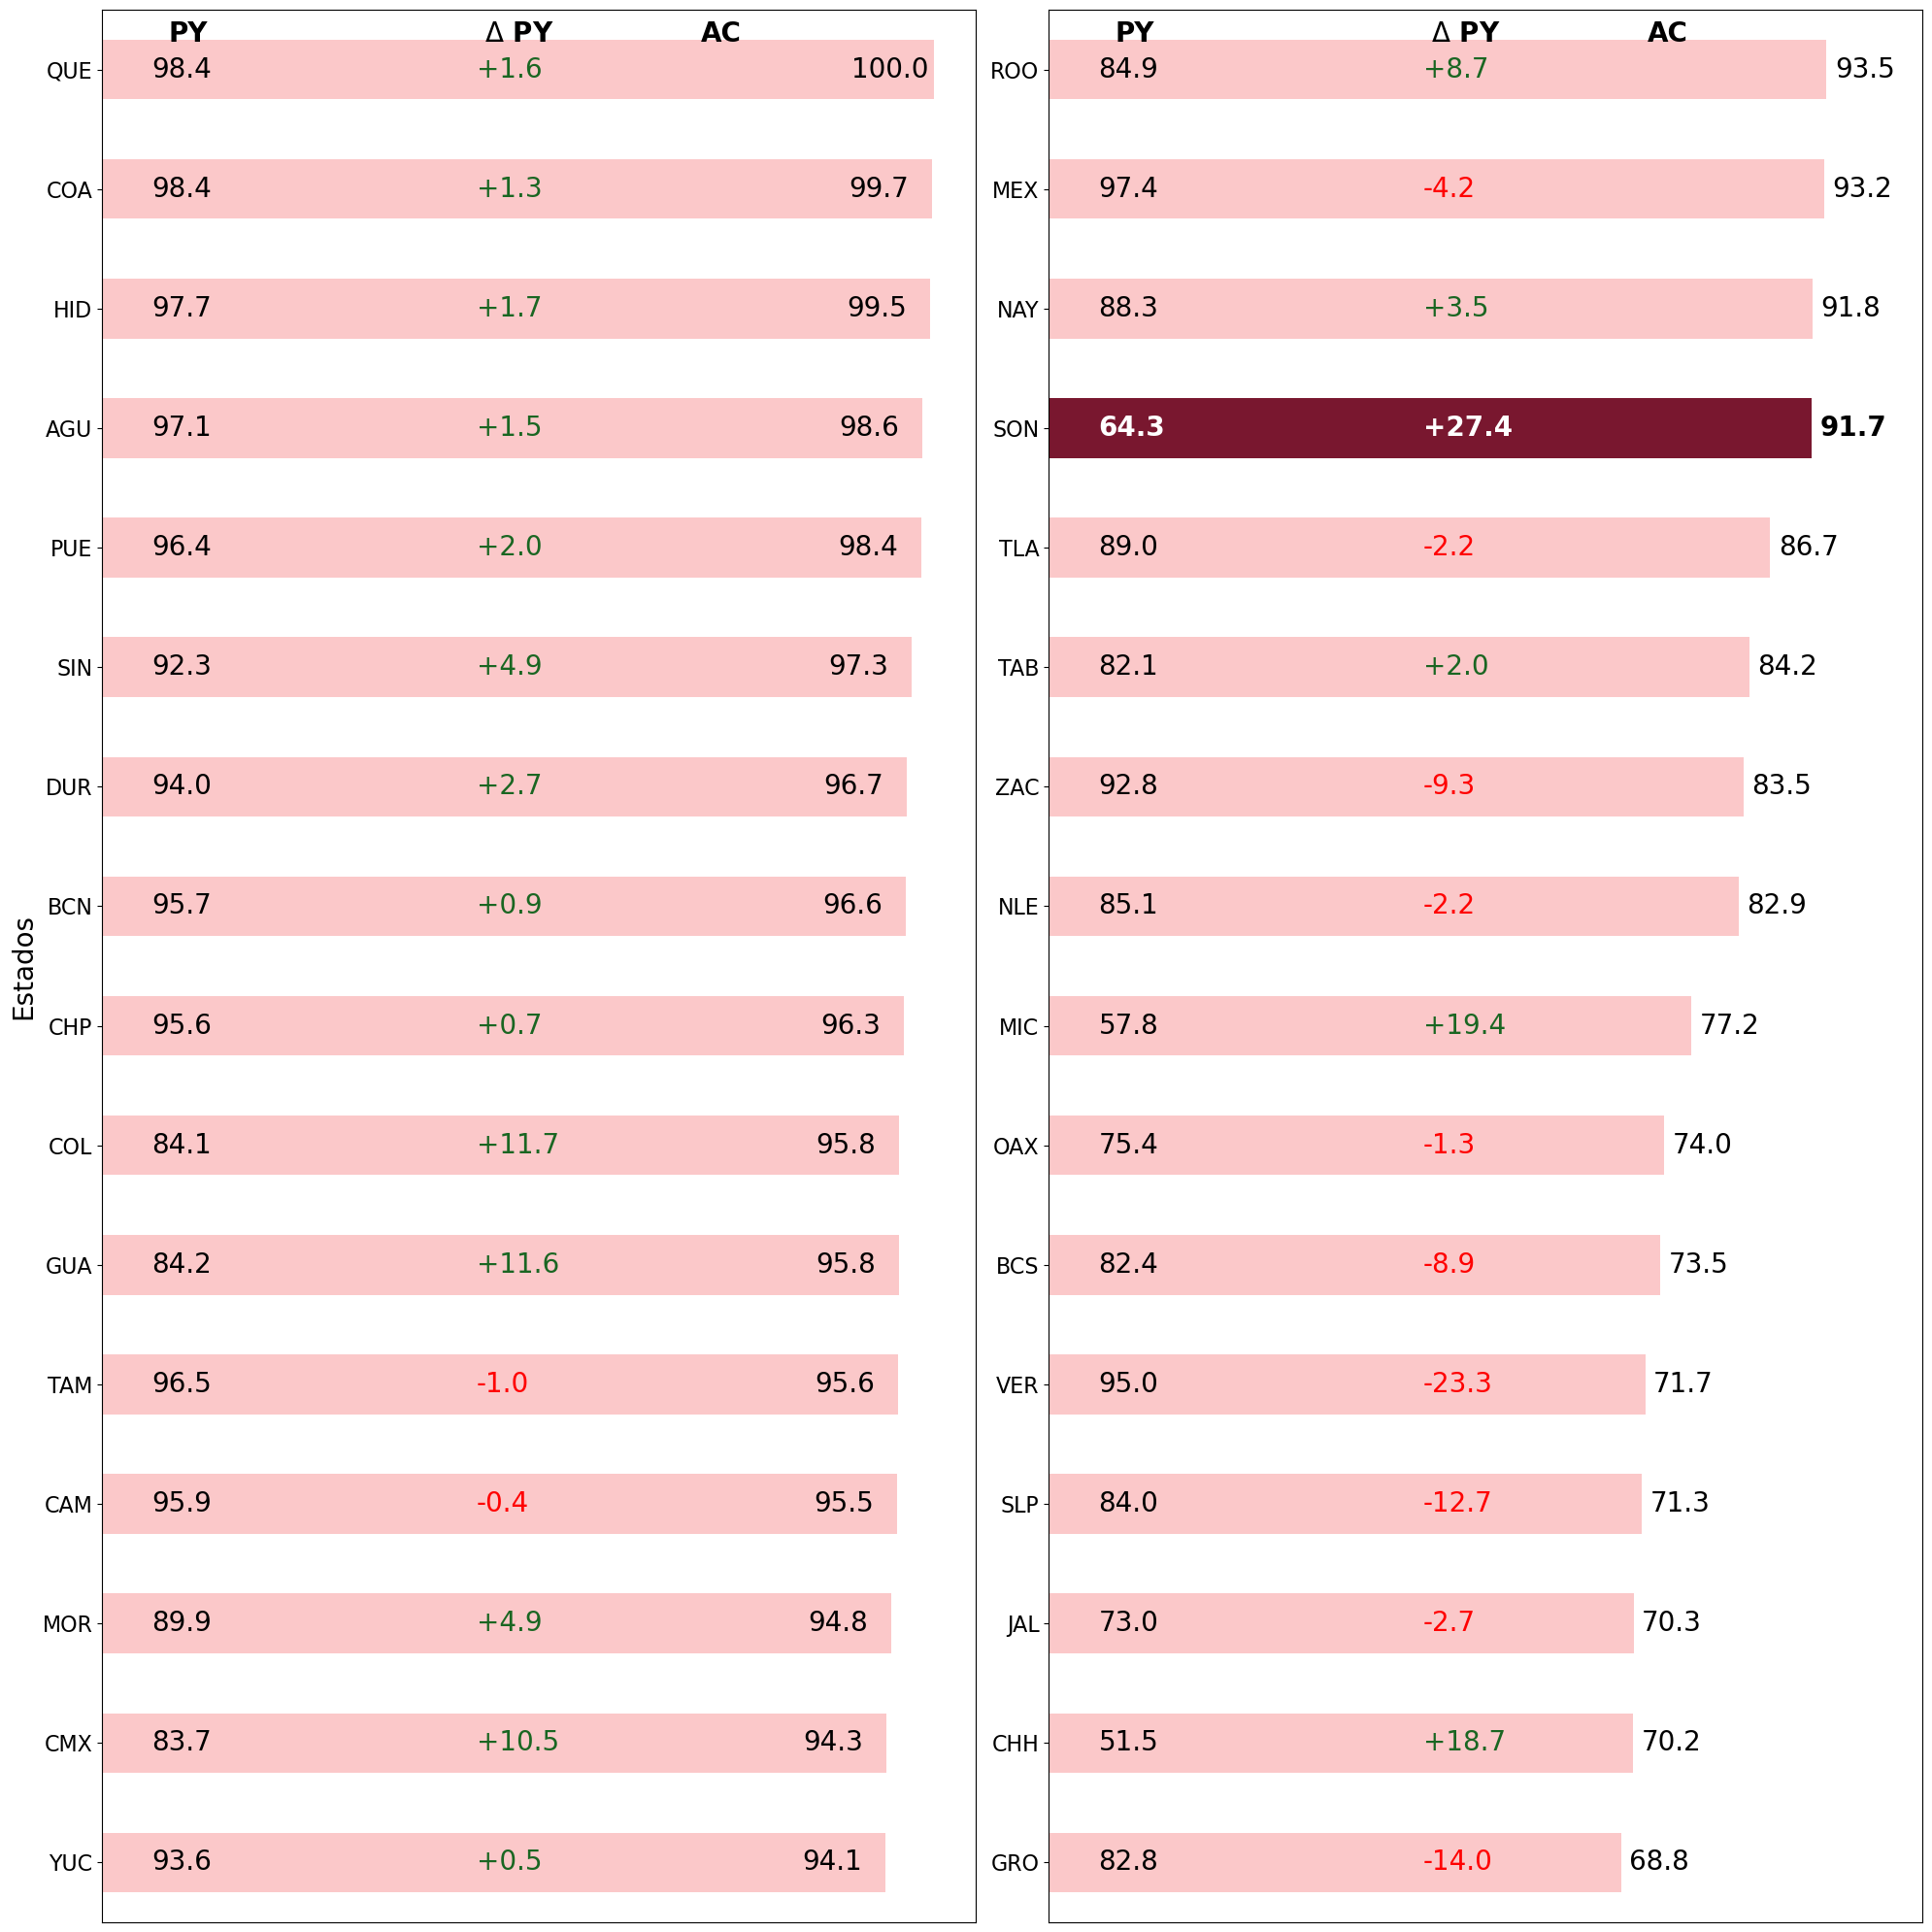

In [163]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (20,20), sharex=True)

tabla_vp2['AC'].plot(kind='barh', color = "#FBC8C9", fontsize=16, ax = ax[0])
py_d_ac(ax[0])
color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp2['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp2['dPY']]
for k, estado in enumerate(tabla_vp2.index):
    ax[0].annotate(text = tabla_vp2.loc[estado, 'PY'],
                        xy=(6, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    ax[0].annotate(text = text_t[k],
                        xy=(45, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        color = color_t[k])
    ax[0].annotate(text = tabla_vp2.loc[estado, 'AC'],
                        xy=(tabla_vp2.loc[estado, 'AC'] - 10, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    


tabla_vp['AC'].plot(kind='barh', color = ["#FBC8C9" for i in range(12)] + ["#79172F", "#FBC8C9", "#FBC8C9", "#FBC8C9"], fontsize=16, ax = ax[1])
py_d_ac(ax[1])




color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp['dPY']]
for k, estado in enumerate(tabla_vp.index):
    if estado == 'SON':
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', color = 'white', weight = 'bold')
        ax[1].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = 'white', weight = 'bold')
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(tabla_vp.loc[estado, 'AC'] + 1, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', weight = 'bold')
    else:
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
        ax[1].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = color_t[k])
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(tabla_vp.loc[estado, 'AC'] + 1, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
ax[0].axes.get_xaxis().set_visible(False)
ax[1].axes.get_xaxis().set_visible(False)
ax[0].set_xlabel('Porcentaje', fontsize = 20)
ax[0].set_ylabel('Estados', fontsize = 20)
ax[1].set_ylabel('', fontsize = 20)
ax[1].set_xlabel('Porcentaje', fontsize = 20)
plt.tight_layout()

In [164]:
tabla_vp = file_vp['Contenido Programático']

tabla_vp.set_index('Estado',drop=True, inplace=True)
tabla_vp['dAbs'] = tabla_vp['dPY'].abs()
tabla_vp['color'] = ['green' if u >= 0 else 'red' for u in tabla_vp['dPY']]
tabla_vp.sort_values('AC', ascending=True, inplace=True)
tabla_s = tabla_vp.copy()

abreviaturas = pd.read_excel('plot_data\\Abreviaturas.xlsx')

abreviaturas['NEW'] = [s[3:] for s in abreviaturas['Abreviatura']]

abreviaturas['Estado'] = abreviaturas['Estado'].str.replace('Estado de ', '')
abreviaturas.iloc[4,0] = 'Coahuila'
abreviaturas.iloc[23,0] = 'San Luís Potosí'
abreviaturas.iloc[21,0] = 'Queretaro'

f = [list(abreviaturas['Estado']).index(u) for u in tabla_s.index]

tabla_s['ABR'] = [list(abreviaturas['NEW'])[q] for q in f]

tabla_s.set_index('ABR',drop=True, inplace=True)
tabla_s

tabla_vp = tabla_s.iloc[:16,]
tabla_vp2 = tabla_s.iloc[16:,]

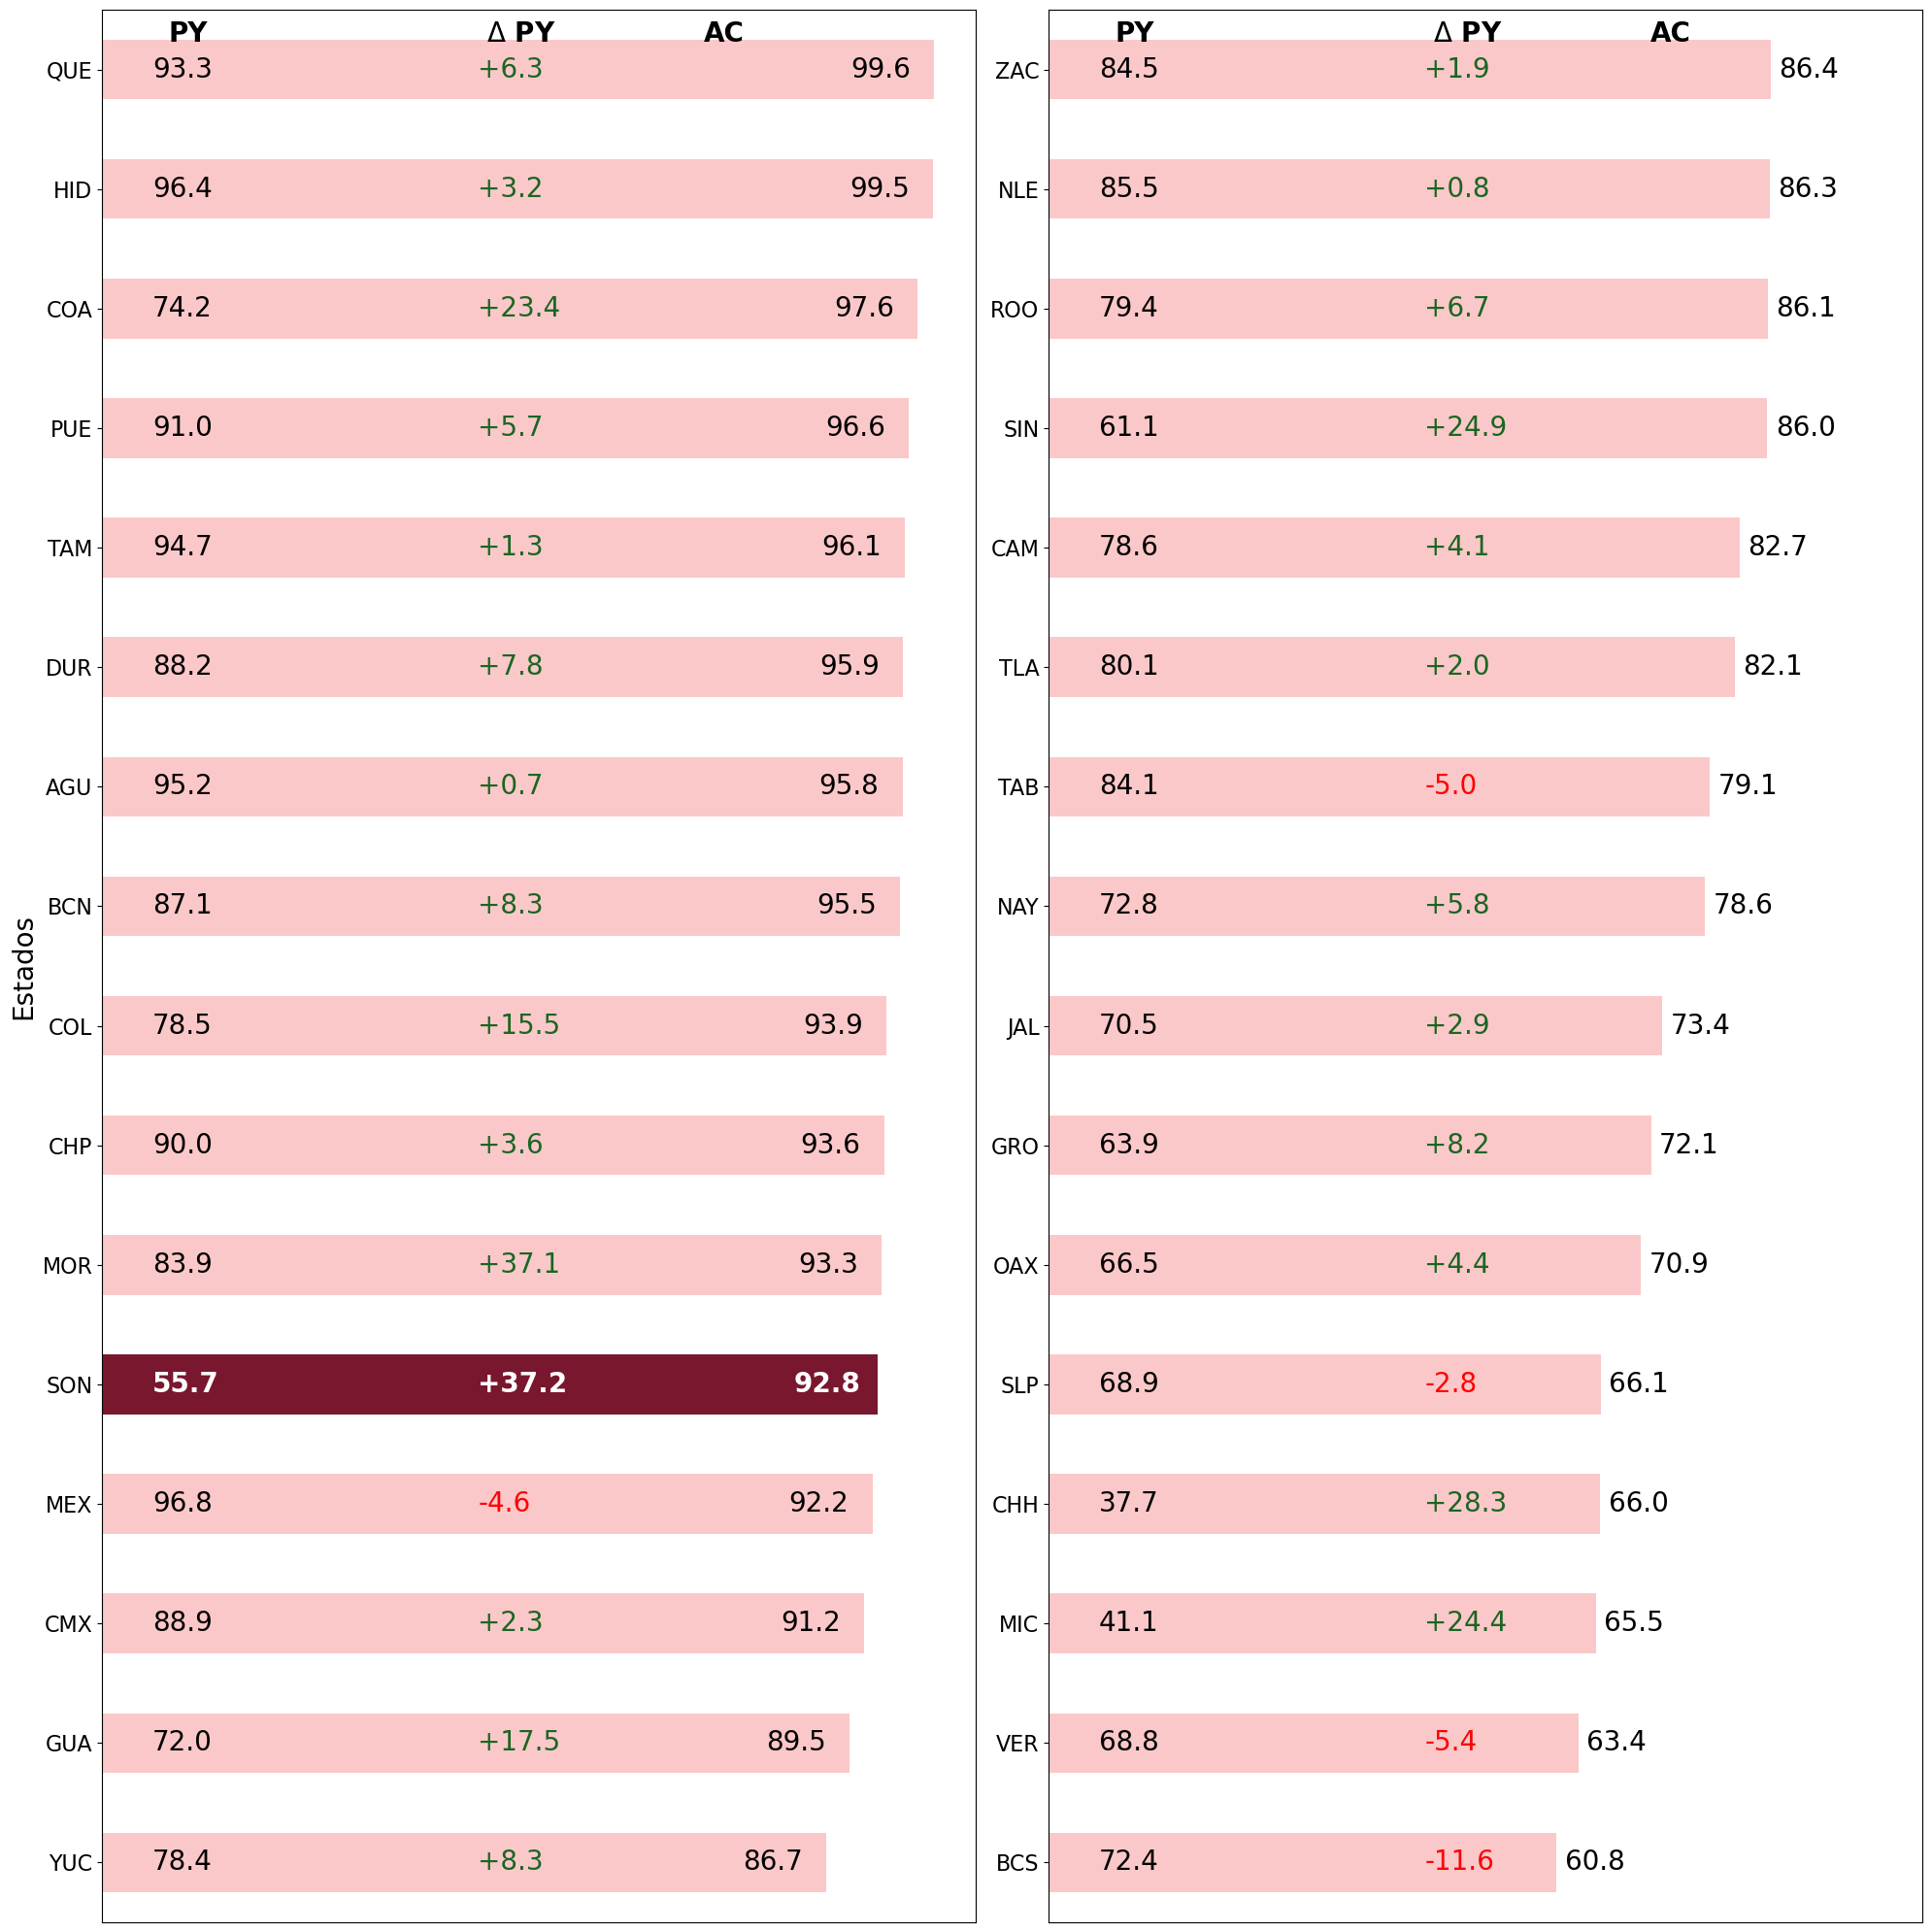

In [165]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (20,20), sharex=True)


tabla_vp2['AC'].plot(kind='barh',
                     color = ["#FBC8C9" for i in range(4)] + ["#79172F"] + ["#FBC8C9" for i in range(11)],
                     fontsize=16, ax = ax[0])
py_d_ac(ax[0])
color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp2['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp2['dPY']]
for k, estado in enumerate(tabla_vp2.index):
    if estado == 'SON':
        ax[0].annotate(text = tabla_vp2.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', color = 'white', weight = 'bold')
        ax[0].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = 'white', weight = 'bold')
        ax[0].annotate(text = tabla_vp2.loc[estado, 'AC'],
                            xy=(tabla_vp2.loc[estado, 'AC'] - 10, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', weight = 'bold', color = 'white')
    else:
        ax[0].annotate(text = tabla_vp2.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
        ax[0].annotate(text = text_t[k],
                            xy=(45, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = color_t[k])
        ax[0].annotate(text = tabla_vp2.loc[estado, 'AC'],
                            xy=(tabla_vp2.loc[estado, 'AC'] - 10, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')


tabla_vp['AC'].plot(kind='barh', color = "#FBC8C9", fontsize=16, ax = ax[1])
py_d_ac(ax[1])



color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp['dPY']]
for k, estado in enumerate(tabla_vp.index):
    ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                        xy=(6, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    ax[1].annotate(text = text_t[k],
                        xy=(45, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        color = color_t[k])
    ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                        xy=(tabla_vp.loc[estado, 'AC'] + 1, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')        
        
ax[0].axes.get_xaxis().set_visible(False)
ax[1].axes.get_xaxis().set_visible(False)
ax[0].set_xlabel('Porcentaje', fontsize = 20)
ax[0].set_ylabel('Estados', fontsize = 20)
ax[1].set_ylabel('', fontsize = 20)
ax[1].set_xlabel('Porcentaje', fontsize = 20)
plt.tight_layout()

In [166]:
tabla_vp = file_vp['Transparencia']
tabla_vp.set_index('Estado',drop=True, inplace=True)
tabla_vp['dAbs'] = tabla_vp['dPY'].abs()
tabla_vp['color'] = ['green' if u >= 0 else 'red' for u in tabla_vp['dPY']]
tabla_vp.sort_values('AC', ascending=True, inplace=True)
tabla_s = tabla_vp.copy()

abreviaturas = pd.read_excel('plot_data\\Abreviaturas.xlsx')

abreviaturas['NEW'] = [s[3:] for s in abreviaturas['Abreviatura']]

abreviaturas['Estado'] = abreviaturas['Estado'].str.replace('Estado de ', '')
abreviaturas.iloc[4,0] = 'Coahuila'
abreviaturas.iloc[23,0] = 'San Luís Potosí'
abreviaturas.iloc[21,0] = 'Querétaro'

f = [list(abreviaturas['Estado']).index(u) for u in tabla_s.index]

tabla_s['ABR'] = [list(abreviaturas['NEW'])[q] for q in f]

tabla_s.set_index('ABR',drop=True, inplace=True)
tabla_s



tabla_vp = tabla_s.iloc[:16,]
tabla_vp2 = tabla_s.iloc[16:,]

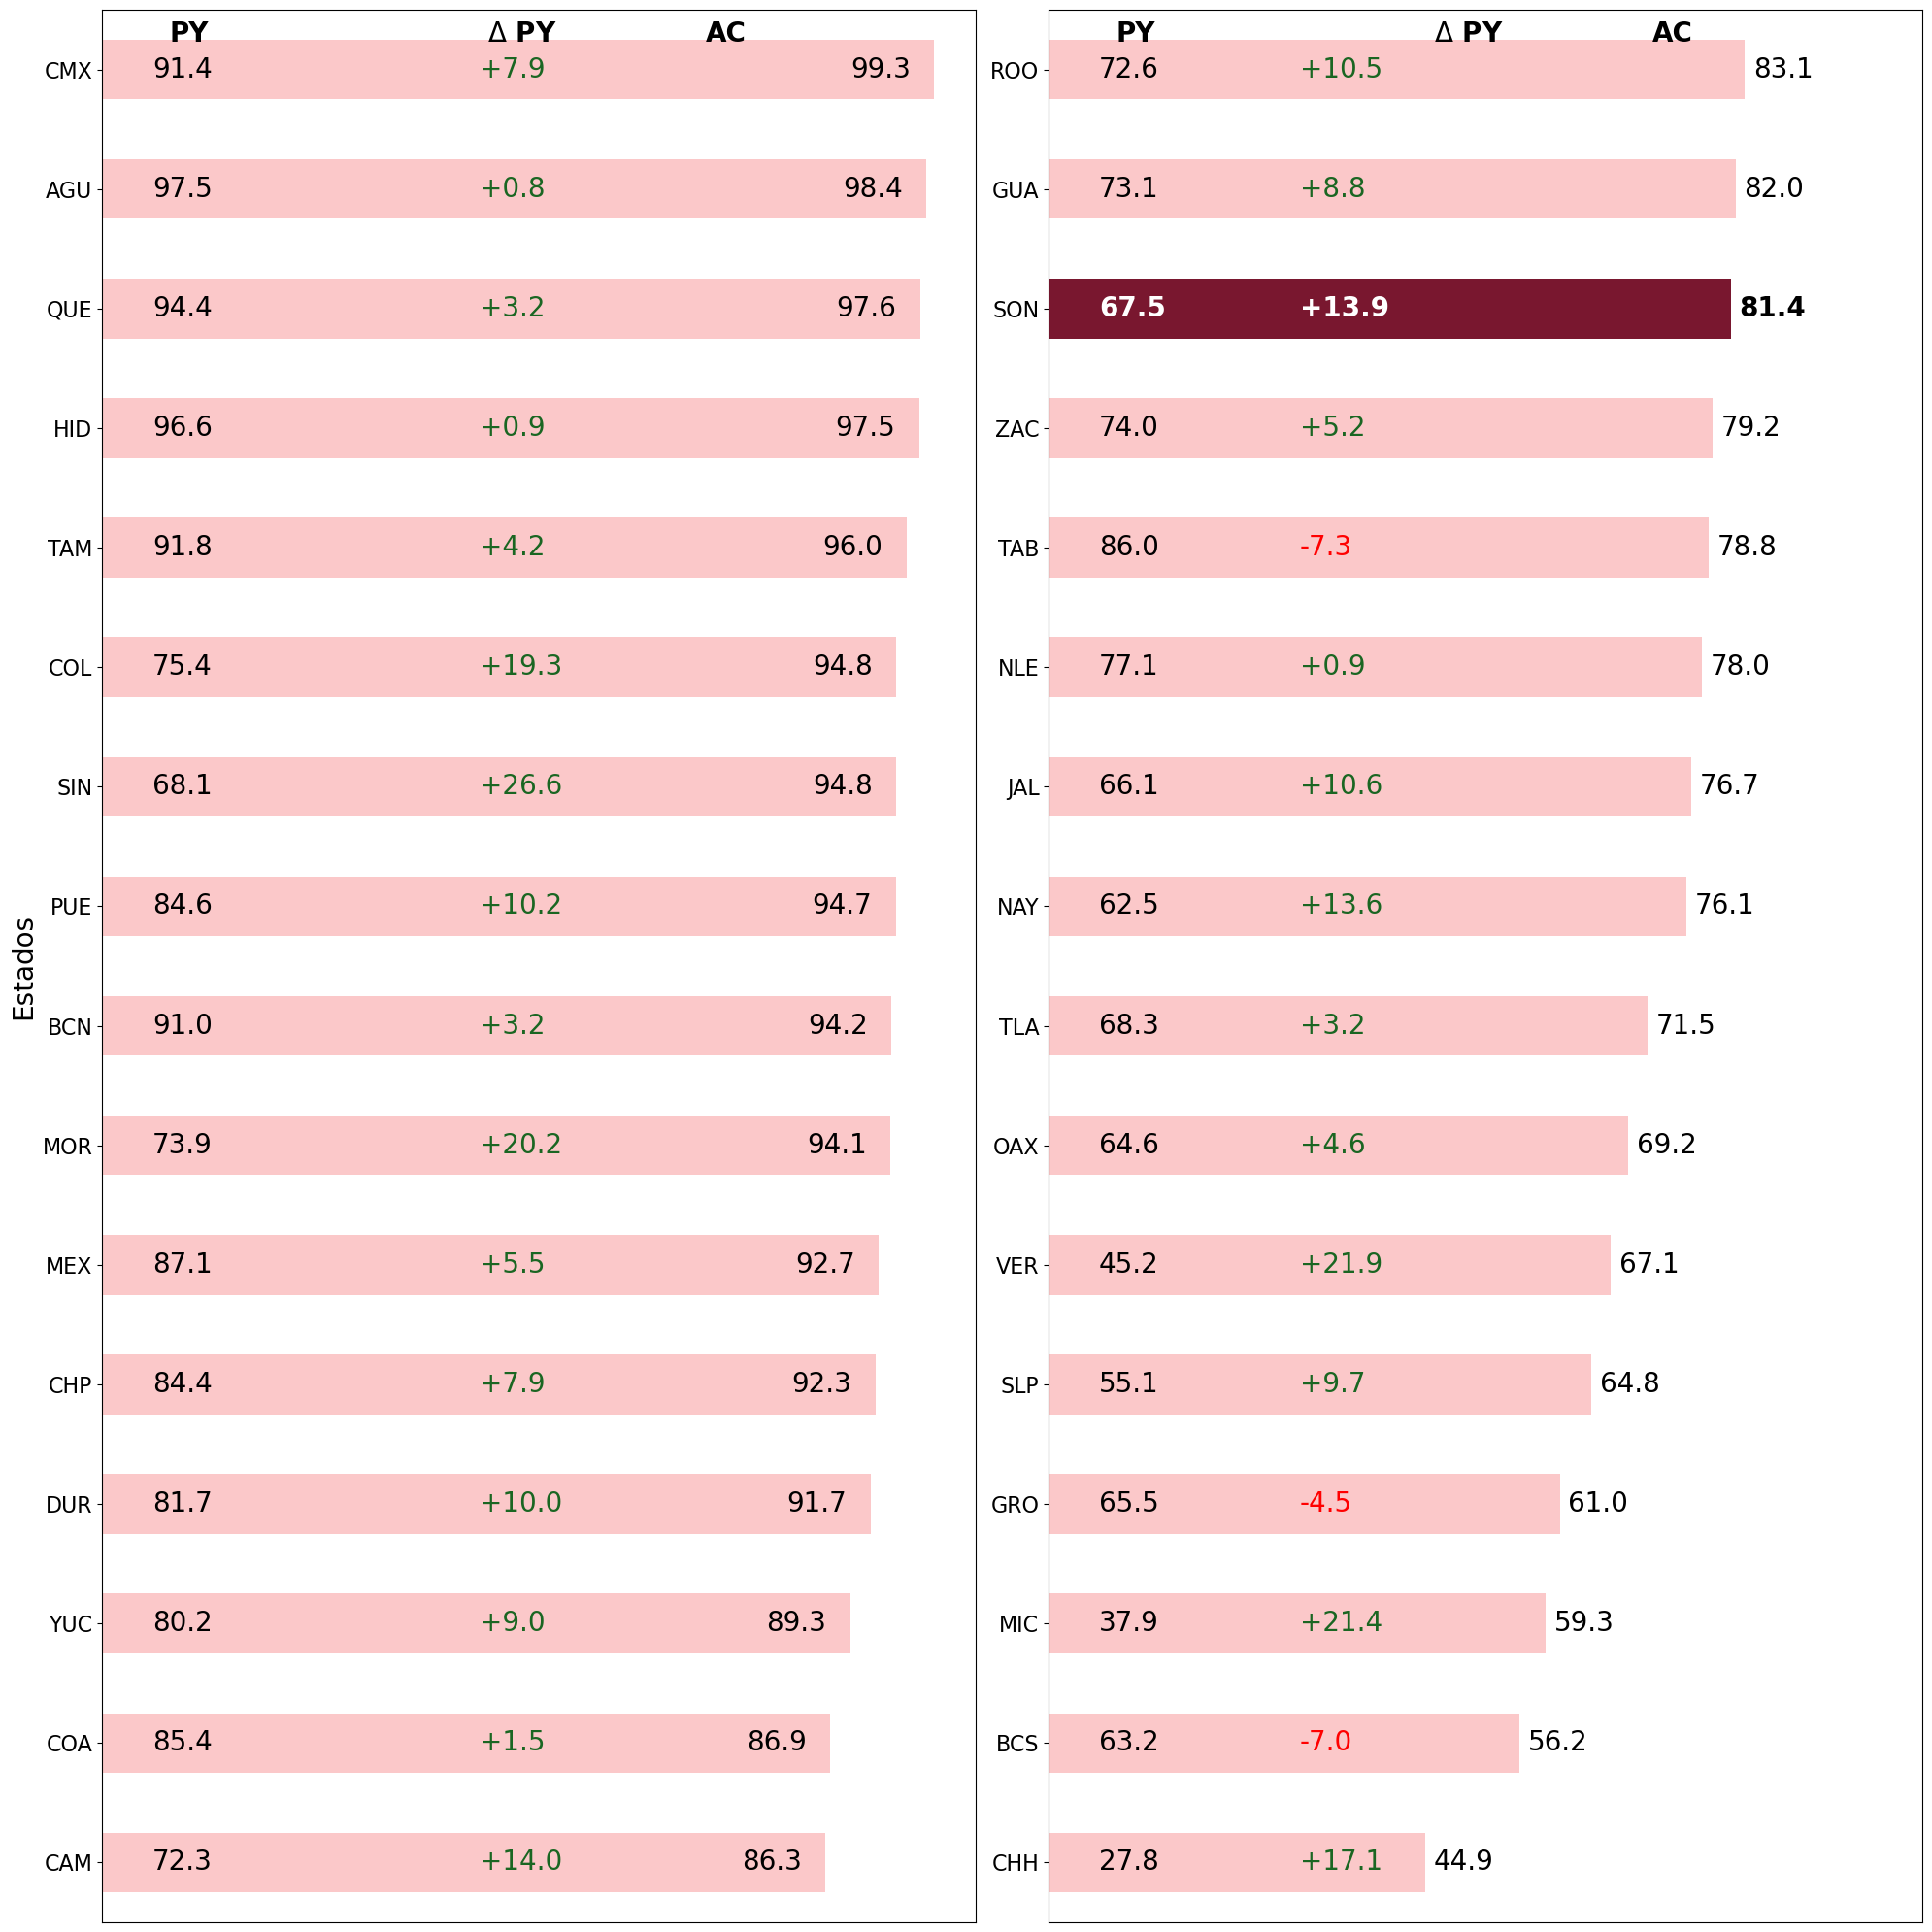

In [167]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (20,20), sharex=True)




tabla_vp2['AC'].plot(kind='barh', color = "#FBC8C9", fontsize=16, ax = ax[0])
py_d_ac(ax[0])
color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp2['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp2['dPY']]
for k, estado in enumerate(tabla_vp2.index):
    ax[0].annotate(text = tabla_vp2.loc[estado, 'PY'],
                        xy=(6, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    ax[0].annotate(text = text_t[k],
                        xy=(45, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center',
                        color = color_t[k])
    ax[0].annotate(text = tabla_vp2.loc[estado, 'AC'],
                        xy=(tabla_vp2.loc[estado, 'AC'] - 10, k), 
                        fontsize=20,
                        horizontalalignment='left', 
                        verticalalignment='center')
    


tabla_vp['AC'].plot(kind='barh', color = ["#FBC8C9" for i in range(13)] + ["#79172F", "#FBC8C9", "#FBC8C9"], fontsize=16, ax = ax[1])
py_d_ac(ax[1])


color_t = ['#1A6622' if v >= 0 else 'red' for v in tabla_vp['dPY']]
text_t = [f'+{round(va, 1)}' if round(va, 1)>= 0 else round(va, 1) for va in tabla_vp['dPY']]
for k, estado in enumerate(tabla_vp.index):
    if estado == 'SON':
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', color = 'white', weight = 'bold')
        ax[1].annotate(text = text_t[k],
                            xy=(30, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = 'white', weight = 'bold')
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(tabla_vp.loc[estado, 'AC'] + 1, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center', weight = 'bold')
    else:
        ax[1].annotate(text = tabla_vp.loc[estado, 'PY'],
                            xy=(6, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
        ax[1].annotate(text = text_t[k],
                            xy=(40 - 10, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center',
                            color = color_t[k])
        ax[1].annotate(text = tabla_vp.loc[estado, 'AC'],
                            xy=(tabla_vp.loc[estado, 'AC'] + 1, k), 
                            fontsize=20,
                            horizontalalignment='left', 
                            verticalalignment='center')
ax[0].axes.get_xaxis().set_visible(False)
ax[1].axes.get_xaxis().set_visible(False)
ax[0].set_xlabel('Porcentaje', fontsize = 20)
ax[0].set_ylabel('Estados', fontsize = 20)
ax[1].set_ylabel('', fontsize = 20)
ax[1].set_xlabel('Porcentaje', fontsize = 20)
plt.tight_layout()

In [168]:
dfs = pd.read_excel('plot_data\\gc.xlsx')
dfp = dfs.iloc[2:-1,1:]
dfp.columns = ['Categorias','Monto','Procentaje']

import plotly.express as px
fig = px.treemap(dfp, 
                 path=[px.Constant(f"{dfs.iloc[-1, 1]} {dfs.iloc[-1, 2]}"),'Categorias'],
                 values='Monto')
fig.update_traces(root_color="lightgrey", pathbar_textfont = {'size': 70})
fig.update_traces(marker_colors = ['red','green','blue','brown','black','red','red','red','red','pink'])
fig.update_layout(height = 800, width = 1000, margin = dict(t=50, l=25, r=25, b=25))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.data[0].customdata = np.column_stack([dfp['Monto'], 100 * dfp['Procentaje']])
fig.data[0].texttemplate = "%{label}<br>Monto:$ %{customdata[0]}<br>Porcentaje: %{customdata[1]:.2f}%"
#fig.data[0].texttemplate = "%{label}<br>%{value}<br>Monto:$ %{customdata[0]}<br>Porcentaje: %{customdata[1]:.2f}%"
fig.show()

In [169]:
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

values = [0, 11, 12, 13, 14, 15, 20, 30]
labels = ["container", "A1", "A2", "A3", "A4", "A5", "B1", "B2"]
parents = ["", "container", "A1", "A2", "A3", "A4", "container", "B1"]

fig = go.Figure(go.Treemap(
    labels = dfp['Categorias'],
    values = dfp['Monto'],
    parents = ["","","","","","","","","","",],
    marker_colorscale = 'Blues')
)

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.show()



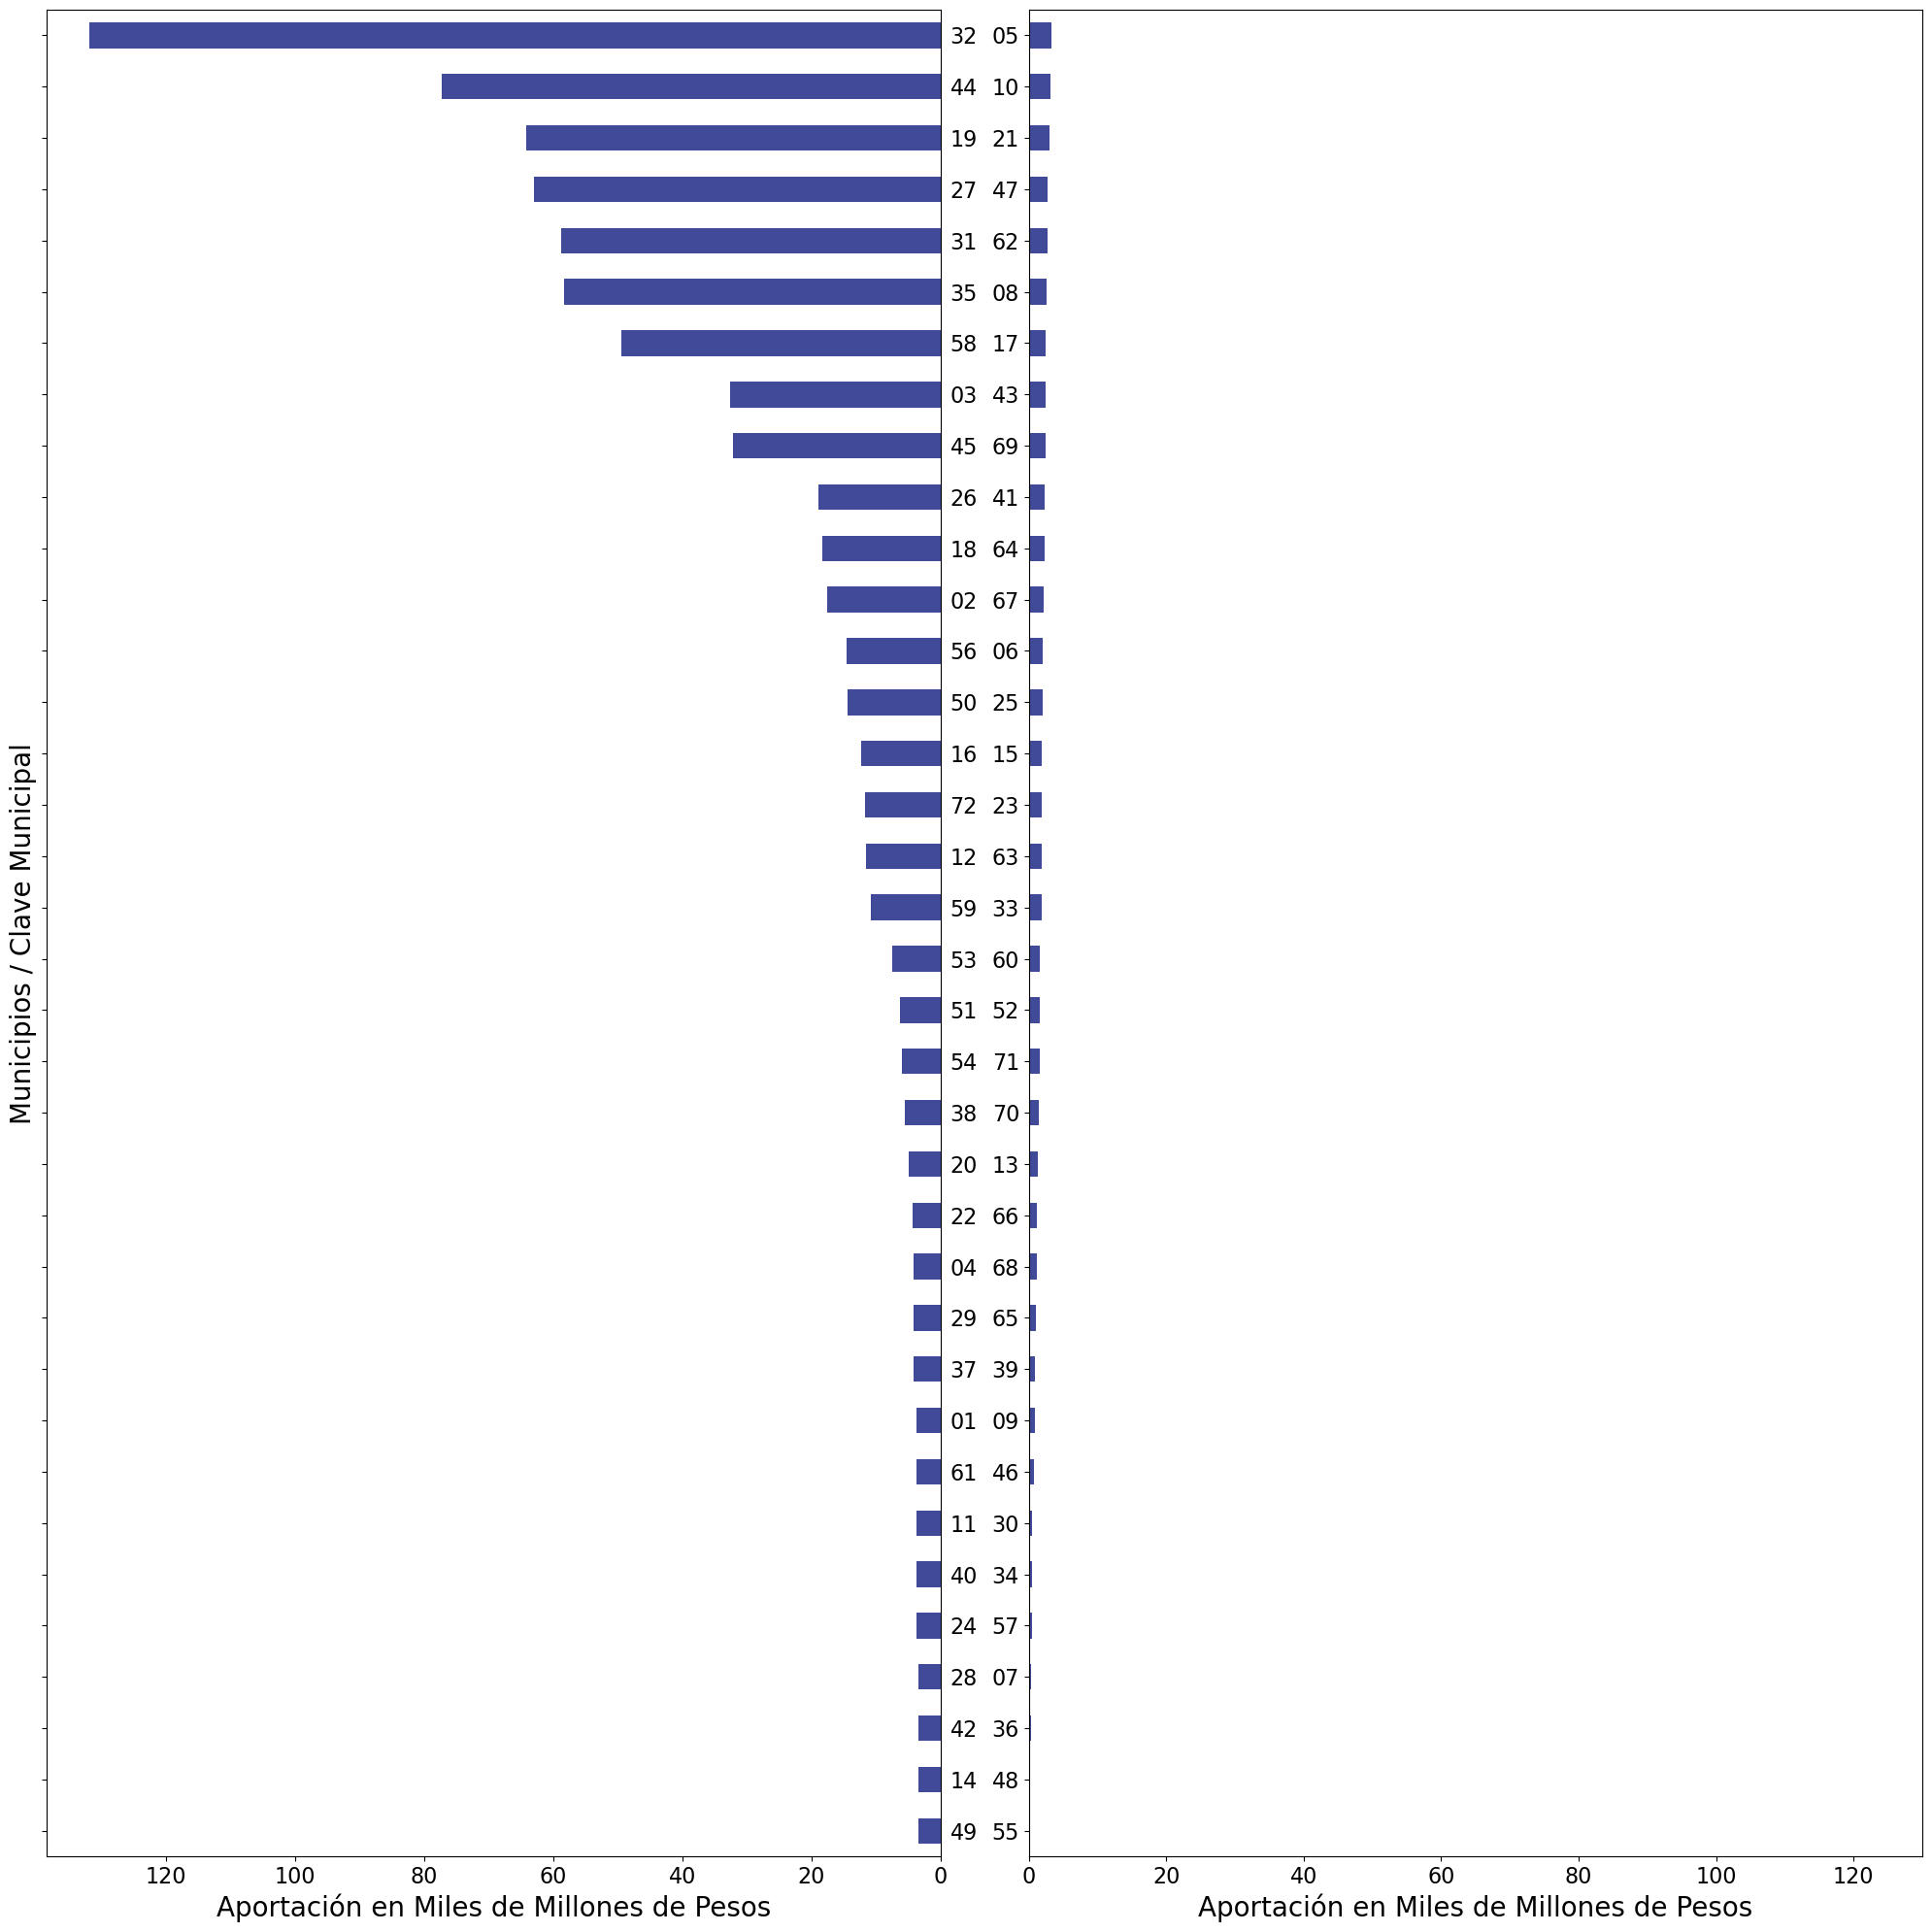

In [172]:
fis2, ax = plt.subplots(ncols=2, nrows=1, figsize = (20,20))
dfr['ANUAL MDP'].plot(kind='barh',
                      color = colors.vp,
                      ax = ax[0],
                      fontsize=16)
ax[0].set_ylabel('Municipios / Clave Municipal', fontsize = 20)
ax[0].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)
ax[0].invert_xaxis()
ax[0].tick_params(axis='y', labelright=True, labelleft=False, left = True, labelsize = 16)
dfl['ANUAL MDP'].plot(kind='barh',
                      color = colors.vp,
                      ax = ax[1],
                      ylabel='',
                      fontsize=16, xlim = [0,130])
ax[1].set_xlabel('Aportación en Miles de Millones de Pesos', fontsize=20)

plt.tight_layout()